In [1]:
"""!pip install sqlalchemy pandas tensorflow scikit-learn matplotlib psycopg2-binary"""

'!pip install sqlalchemy pandas tensorflow scikit-learn matplotlib psycopg2-binary'

## Reading DB

In [1]:
from sqlalchemy import create_engine
import getpass
import pandas as pd


DB_NAME="mimic3"
DB_USER="postgres"
DB_PASSWORD = getpass.getpass("Enter password: ")
DB_HOST="localhost"
DB_PORT=5432
DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
eng = create_engine(DATABASE_URL)

In [2]:
# Test connection with pandas
query = "SELECT * FROM first_admission_data"
df = pd.read_sql(query, eng)

print(df.shape)
df.head(10)


(29082, 46)


,subject_id,hadm_id,gender,age,dob,dod,admittime,mortality_1yr,weight_kg,respiratory_rate,...,cardiovascular,neurological,pulmonary,diabetes,renal,liver,cancer,mental_substance,hem_metabolic,autoimmune
0,5692,151113,M,44.0,2099-09-01,NaT,2143-10-23 15:42:00,0,NaN,25.0,...,1,0,0,0,0,0,0,0,0,0
1,82633,113066,M,55.0,2074-05-07,NaT,2129-11-20 03:47:00,0,71.0,20.0,...,0,0,0,0,0,0,0,1,0,0
2,90158,115959,M,21.0,2155-05-05,NaT,2176-07-19 19:35:00,0,65.9,17.0,...,1,1,0,0,0,0,0,0,0,0
3,76727,191656,M,77.0,2041-09-11,NaT,2119-02-24 10:45:00,0,74.5,25.0,...,0,0,1,0,0,0,1,0,0,0
4,56045,195101,F,65.0,2086-09-01,NaT,2152-02-06 10:36:00,0,106.0,12.0,...,1,0,1,1,0,0,0,0,1,0
5,20913,128124,M,49.0,2087-10-22,2138-01-02,2137-04-30 21:08:00,1,136.0,22.0,...,1,0,1,1,1,0,0,0,1,0
6,19616,193383,M,53.0,2060-02-05,NaT,2113-08-16 08:00:00,0,101.5,10.0,...,1,0,1,0,0,0,0,0,0,0
7,99645,152926,M,78.0,2072-06-08,NaT,2151-05-05 08:00:00,0,87.6,12.0,...,1,0,0,0,0,0,1,1,0,0
8,26097,126042,F,43.0,2078-08-17,NaT,2122-01-28 21:28:00,0,NaN,24.0,...,1,0,0,0,0,0,0,0,1,0
9,19698,199543,M,56.0,2129-08-03,2187-01-09,2185-10-29 18:36:00,0,96.0,17.0,...,1,0,0,1,0,1,0,0,0,0


In [3]:
column_names = df.columns.tolist()

print(column_names)

['subject_id', 'hadm_id', 'gender', 'age', 'dob', 'dod', 'admittime', 'mortality_1yr', 'weight_kg', 'respiratory_rate', 'heart_rate', 'nbp_systolic', 'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph', 'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', 'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', 'platelet_count', 'inr', 'pt', 'ptt', 'temperature', 'gcs', 'cardiovascular', 'neurological', 'pulmonary', 'diabetes', 'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', 'autoimmune']


In [4]:
# Drop unwanted columns
df = df.drop(columns=['dob', 'dod', 'admittime'], errors='ignore')

# Convert gender: M → 1, F → 0
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

# Fill NaNs with mean for numeric columns
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())

# Ensure 'age' is integer, others are rounded to 2 decimals
df['age'] = df['age'].round().astype(int)
for col in df.select_dtypes(include='number').columns:
    if col != 'age':
        df[col] = df[col].round(2)

In [5]:
print(df.shape)
df.head(10)

(29082, 43)


,subject_id,hadm_id,gender,age,mortality_1yr,weight_kg,respiratory_rate,heart_rate,nbp_systolic,nbp_diastolic,...,cardiovascular,neurological,pulmonary,diabetes,renal,liver,cancer,mental_substance,hem_metabolic,autoimmune
0,5692,151113,1,44,0,85.24,25.0,90.0,98.0,65.33,...,1,0,0,0,0,0,0,0,0,0
1,82633,113066,1,55,0,71.00,20.0,98.0,121.0,77.00,...,0,0,0,0,0,0,0,1,0,0
2,90158,115959,1,21,0,65.90,17.0,96.0,130.0,66.00,...,1,1,0,0,0,0,0,0,0,0
3,76727,191656,1,77,0,74.50,25.0,83.0,148.0,66.00,...,0,0,1,0,0,0,1,0,0,0
4,56045,195101,0,65,0,106.00,12.0,88.0,101.0,38.00,...,1,0,1,1,0,0,0,0,1,0
5,20913,128124,1,49,1,136.00,22.0,79.0,119.0,75.67,...,1,0,1,1,1,0,0,0,1,0
6,19616,193383,1,53,0,101.50,10.0,88.0,111.0,81.00,...,1,0,1,0,0,0,0,0,0,0
7,99645,152926,1,78,0,87.60,12.0,61.0,121.0,75.00,...,1,0,0,0,0,0,1,1,0,0
8,26097,126042,0,43,0,85.24,24.0,95.0,95.0,57.00,...,1,0,0,0,0,0,0,0,1,0
9,19698,199543,1,56,0,96.00,17.0,62.0,131.0,99.00,...,1,0,0,1,0,1,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split


# Split the dataset into two halves
#dfA, dfB= train_test_split(df, test_size=0.5, random_state=42)
dfA, dfB= train_test_split(df, test_size=0.5, random_state=42,stratify=df['mortality_1yr'])

In [7]:
column_names = df.columns.tolist()

print(column_names)

['subject_id', 'hadm_id', 'gender', 'age', 'mortality_1yr', 'weight_kg', 'respiratory_rate', 'heart_rate', 'nbp_systolic', 'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph', 'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', 'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', 'platelet_count', 'inr', 'pt', 'ptt', 'temperature', 'gcs', 'cardiovascular', 'neurological', 'pulmonary', 'diabetes', 'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', 'autoimmune']


In [8]:
# Common attributes (keep these in both dfA and dfB)
common_attributes = [
    'subject_id', 'hadm_id', 'gender', 'age', 'weight_kg', 'gcs', 
    'cardiovascular', 'neurological', 'pulmonary', 'diabetes', 
    'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', 
    'autoimmune', 'mortality_1yr'
]

# Set A specific attributes
set_A_attributes = [
    'temperature', 'respiratory_rate', 'heart_rate', 'nbp_systolic', 
    'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph'
]

# Set B specific attributes
set_B_attributes = [
    'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', 
    'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', 
    'platelet_count', 'inr', 'pt', 'ptt'
]


In [9]:
dfA = dfA[common_attributes + set_A_attributes]
dfB = dfB[common_attributes + set_B_attributes]

print(dfA['mortality_1yr'].value_counts())
print(dfB['mortality_1yr'].value_counts())


mortality_1yr
0    11534
1     3007
Name: count, dtype: int64
mortality_1yr
0    11535
1     3006
Name: count, dtype: int64


In [10]:
print(dfA.shape)
dfA.head(10)

(14541, 27)


,subject_id,hadm_id,gender,age,weight_kg,gcs,cardiovascular,neurological,pulmonary,diabetes,...,temperature,respiratory_rate,heart_rate,nbp_systolic,nbp_diastolic,spo2,fio2,po2,pco2,ph
20429,23857,182768,0,62,85.24,3.00,0,0,0,0,...,34.22,20.0,140.0,97.00,72.33,99.0,1.00,199.00,43.00,7.14
7241,58431,189205,0,21,70.00,12.15,1,0,0,0,...,36.39,20.0,129.0,129.00,62.00,92.0,100.00,178.00,50.00,7.38
5319,70386,189427,0,30,52.50,15.00,0,0,0,1,...,36.83,16.0,112.0,98.00,62.00,100.0,31.74,196.00,25.00,7.26
4620,86618,181332,1,43,70.00,13.92,0,0,0,0,...,37.89,14.0,101.0,137.00,72.00,100.0,100.00,136.00,36.00,7.45
26552,41487,147276,1,71,90.00,11.20,1,0,0,0,...,35.94,14.0,88.0,115.00,78.00,99.0,100.00,465.00,41.00,7.40
5115,18851,145187,1,60,89.70,3.00,1,0,1,1,...,36.56,14.0,88.0,122.08,75.43,100.0,0.40,81.00,43.00,7.41
8179,95456,180792,1,59,95.80,14.83,1,0,0,0,...,36.50,11.0,58.0,150.00,60.00,96.0,31.74,214.49,42.31,7.37
26846,9633,165463,1,71,85.24,11.38,1,0,0,0,...,31.44,15.0,76.0,122.08,75.43,97.0,1.00,115.00,47.00,7.13
1866,1144,197299,1,69,109.10,3.00,1,0,0,0,...,36.11,12.0,87.0,85.00,61.00,100.0,1.00,357.00,47.00,7.36
28977,55180,120102,1,55,71.00,14.55,1,0,0,1,...,36.28,10.0,80.0,122.08,75.43,96.0,50.00,221.00,39.00,7.36


In [11]:
print(dfB.shape)
dfB.head(10)

(14541, 33)


,subject_id,hadm_id,gender,age,weight_kg,gcs,cardiovascular,neurological,pulmonary,diabetes,...,anion_gap,bilirubin,albumin,wbc,hemoglobin,hematocrit,platelet_count,inr,pt,ptt
20394,44908,173941,1,60,83.20,15.00,1,0,1,1,...,12.0,0.70,3.32,14.2,10.2,32.2,249.0,5.5,49.9,40.3
2905,59959,165052,1,28,84.60,15.00,0,0,0,0,...,12.0,1.00,3.90,4.6,14.4,39.5,47.0,1.1,13.1,28.5
28131,95609,186369,1,76,77.60,15.00,1,0,0,0,...,11.0,1.42,3.32,7.7,13.5,39.6,193.0,1.1,12.8,28.4
16482,80133,130380,1,44,80.80,14.93,0,0,1,0,...,14.0,1.42,3.32,31.1,14.7,43.4,290.0,1.1,12.8,25.1
7983,55719,143927,0,62,63.40,14.75,1,0,0,0,...,10.0,0.50,4.30,4.1,13.2,37.6,202.0,1.1,12.9,32.4
14050,23844,168279,0,36,64.60,15.00,1,0,0,0,...,13.0,0.70,2.50,5.9,10.7,30.1,380.0,1.2,13.8,35.4
17981,89528,120508,0,64,80.00,14.76,1,0,0,1,...,15.0,0.90,3.80,7.9,14.8,41.9,237.0,1.2,13.8,110.1
20098,51545,121577,1,77,75.50,14.97,1,0,1,0,...,21.0,0.50,3.50,12.7,12.2,38.3,192.0,1.2,13.8,23.7
9155,14966,176522,1,52,85.24,6.00,0,1,0,0,...,15.0,0.30,3.90,9.5,13.5,35.7,194.0,1.1,12.3,27.2
22730,11850,152968,1,51,85.24,15.00,1,0,0,1,...,11.0,0.80,2.90,4.8,9.4,29.8,106.0,2.4,18.9,35.6


In [12]:
dfA_common = dfA[common_attributes]
dfB_common = dfB[common_attributes]


In [13]:
print(dfA_common.shape)
dfA_common.head(10)

(14541, 17)


,subject_id,hadm_id,gender,age,weight_kg,gcs,cardiovascular,neurological,pulmonary,diabetes,renal,liver,cancer,mental_substance,hem_metabolic,autoimmune,mortality_1yr
20429,23857,182768,0,62,85.24,3.00,0,0,0,0,0,0,0,0,0,0,1
7241,58431,189205,0,21,70.00,12.15,1,0,0,0,0,0,0,0,1,0,0
5319,70386,189427,0,30,52.50,15.00,0,0,0,1,0,0,0,0,0,0,0
4620,86618,181332,1,43,70.00,13.92,0,0,0,0,0,1,0,0,1,0,0
26552,41487,147276,1,71,90.00,11.20,1,0,0,0,0,0,0,0,0,0,0
5115,18851,145187,1,60,89.70,3.00,1,0,1,1,0,0,0,0,0,0,0
8179,95456,180792,1,59,95.80,14.83,1,0,0,0,0,0,0,0,0,0,0
26846,9633,165463,1,71,85.24,11.38,1,0,0,0,0,0,0,0,0,0,1
1866,1144,197299,1,69,109.10,3.00,1,0,0,0,0,0,0,0,0,0,0
28977,55180,120102,1,55,71.00,14.55,1,0,0,1,1,1,0,0,1,0,0


In [14]:
print(dfB_common.shape)
dfB_common.head(10)

(14541, 17)


,subject_id,hadm_id,gender,age,weight_kg,gcs,cardiovascular,neurological,pulmonary,diabetes,renal,liver,cancer,mental_substance,hem_metabolic,autoimmune,mortality_1yr
20394,44908,173941,1,60,83.20,15.00,1,0,1,1,0,0,0,0,0,0,0
2905,59959,165052,1,28,84.60,15.00,0,0,0,0,0,0,0,0,1,0,0
28131,95609,186369,1,76,77.60,15.00,1,0,0,0,0,0,0,0,0,1,0
16482,80133,130380,1,44,80.80,14.93,0,0,1,0,0,0,0,0,0,0,0
7983,55719,143927,0,62,63.40,14.75,1,0,0,0,0,0,0,0,0,0,0
14050,23844,168279,0,36,64.60,15.00,1,0,0,0,0,0,0,0,1,0,0
17981,89528,120508,0,64,80.00,14.76,1,0,0,1,0,0,0,0,1,0,0
20098,51545,121577,1,77,75.50,14.97,1,0,1,0,1,0,0,1,1,0,1
9155,14966,176522,1,52,85.24,6.00,0,1,0,0,0,0,1,0,0,0,0
22730,11850,152968,1,51,85.24,15.00,1,0,0,1,0,0,0,0,0,0,0


## Creating NN

### Dual Branch: Dataset A

In [15]:
"""# Common attributes (keep these in both dfA and dfB)
common_attributes = [
    'subject_id', 'hadm_id', 'gender', 'age', 'weight_kg', 'gcs', 
    'cardiovascular', 'neurological', 'pulmonary', 'diabetes', 
    'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', 
    'autoimmune', 'mortality_1yr'
]

# Set A specific attributes
set_A_attributes = [
    'temperature', 'respiratory_rate', 'heart_rate', 'nbp_systolic', 
    'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph'
]

# Set B specific attributes
set_B_attributes = [
    'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', 
    'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', 
    'platelet_count', 'inr', 'pt', 'ptt'
]"""

"# Common attributes (keep these in both dfA and dfB)\ncommon_attributes = [\n    'subject_id', 'hadm_id', 'gender', 'age', 'weight_kg', 'gcs', \n    'cardiovascular', 'neurological', 'pulmonary', 'diabetes', \n    'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', \n    'autoimmune', 'mortality_1yr'\n]\n\n# Set A specific attributes\nset_A_attributes = [\n    'temperature', 'respiratory_rate', 'heart_rate', 'nbp_systolic', \n    'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph'\n]\n\n# Set B specific attributes\nset_B_attributes = [\n    'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', \n    'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', \n    'platelet_count', 'inr', 'pt', 'ptt'\n]"

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

id_columns_A = dfA[['subject_id', 'hadm_id']]
X_common = dfA.drop(columns=set_A_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
X_spec = dfA[set_A_attributes]
y = dfA['mortality_1yr']


X_common_train, X_common_test, X_spec_train, X_spec_test, y_train, y_test, id_train, id_test = train_test_split(
    X_common, X_spec, y, id_columns_A,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded = to_categorical(y_train)

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

def build_dual_branch_nn(common_dim, specific_dim,learning_rate):
    # Common branch 
    common_input = Input(shape=(common_dim,), name='common_input')
    x_common = layers.Dense(256, activation='relu')(common_input)
    x_common = layers.Dense(128, activation='relu')(x_common)
    x_common = layers.Dense(64, activation='relu')(x_common)

    #Specific branch
    specific_input = Input(shape=(specific_dim,), name='specific_input')
    x_spec = layers.Dense(256, activation='relu')(specific_input)
    x_spec = layers.Dense(128, activation='relu')(x_spec)
    x_spec = layers.Dense(64, activation='relu')(x_spec)

    # --- Concatenate ---
    x = layers.Concatenate(name='concat')([x_common, x_spec])
    output = layers.Dense(2, activation='softmax', name='output')(x)

    # --- Model ---
    model = models.Model(inputs=[common_input, specific_input], outputs=output)

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['AUC', 'Precision', 'Recall']
    )
    return model


In [18]:
import matplotlib.pyplot as plt
def plot_history(history, lr):
    keys = history.history.keys()
    print(f"\n📊 Plotting for learning rate: {lr}")
    print("🧪 History keys:", keys)

    plt.figure(figsize=(16, 10))

    plots = [
        ('loss', 'val_loss'),
        ('AUC', 'val_AUC'),
        ('Precision', 'val_Precision'),
        ('Recall', 'val_Recall')
    ]

    for i, (train_metric, val_metric) in enumerate(plots):
        if train_metric in keys and val_metric in keys:
            plt.subplot(2, 2, i + 1)
            plt.plot(history.history[train_metric], label='Train')
            plt.plot(history.history[val_metric], label='Validation')
            plt.title(f"{train_metric.upper()} vs {val_metric.upper()} (lr={lr})")
            plt.xlabel("Epoch")
            plt.ylabel(train_metric)
            plt.legend()
            plt.grid(True)

    plt.tight_layout()
    plt.show()


 Training model with learning rate: 0.01
✅ Training completed.

 Training model with learning rate: 0.001
✅ Training completed.

 Training model with learning rate: 0.0001
✅ Training completed.

📊 Plotting for learning rate: 0.01
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


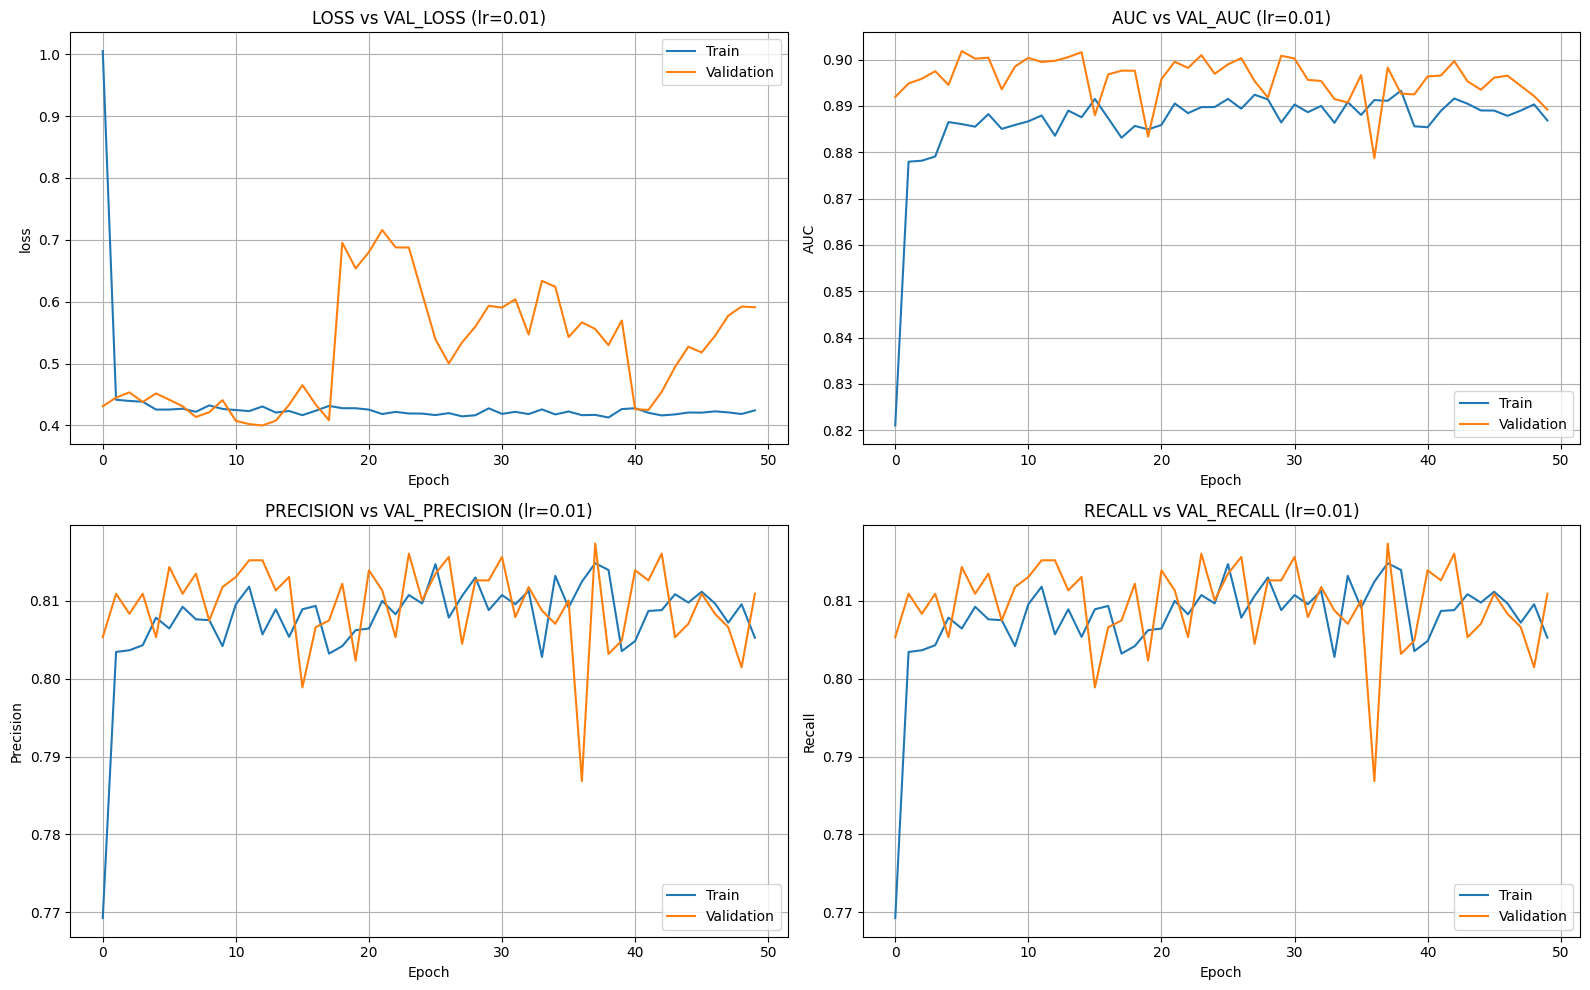


📊 Plotting for learning rate: 0.001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


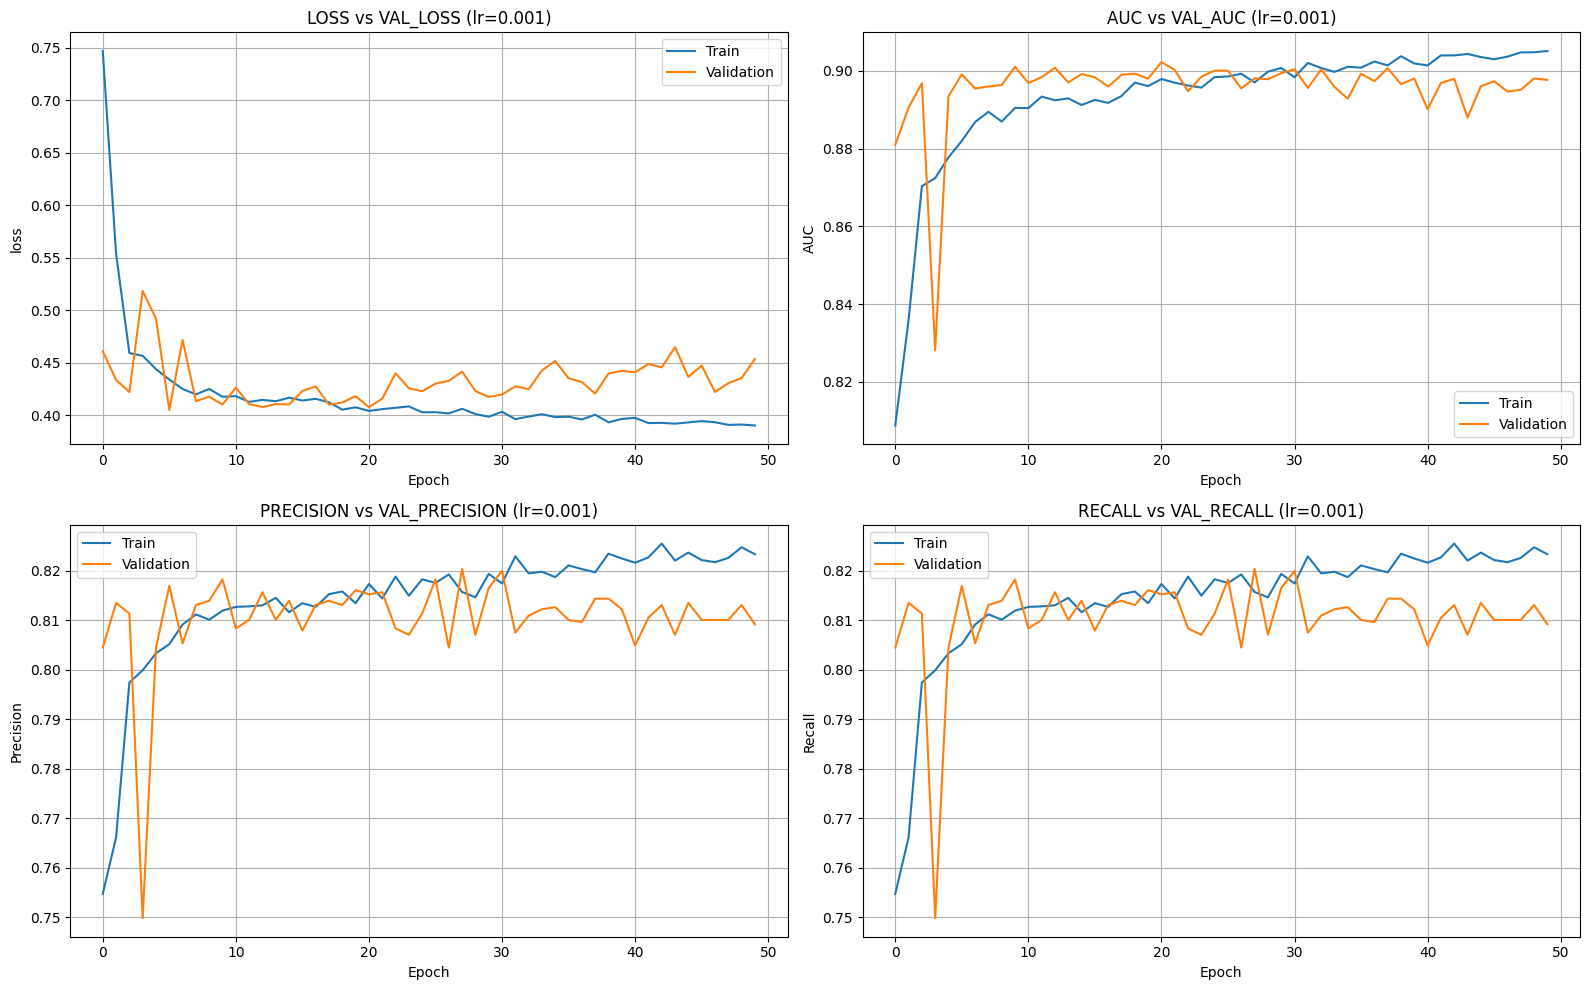


📊 Plotting for learning rate: 0.0001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


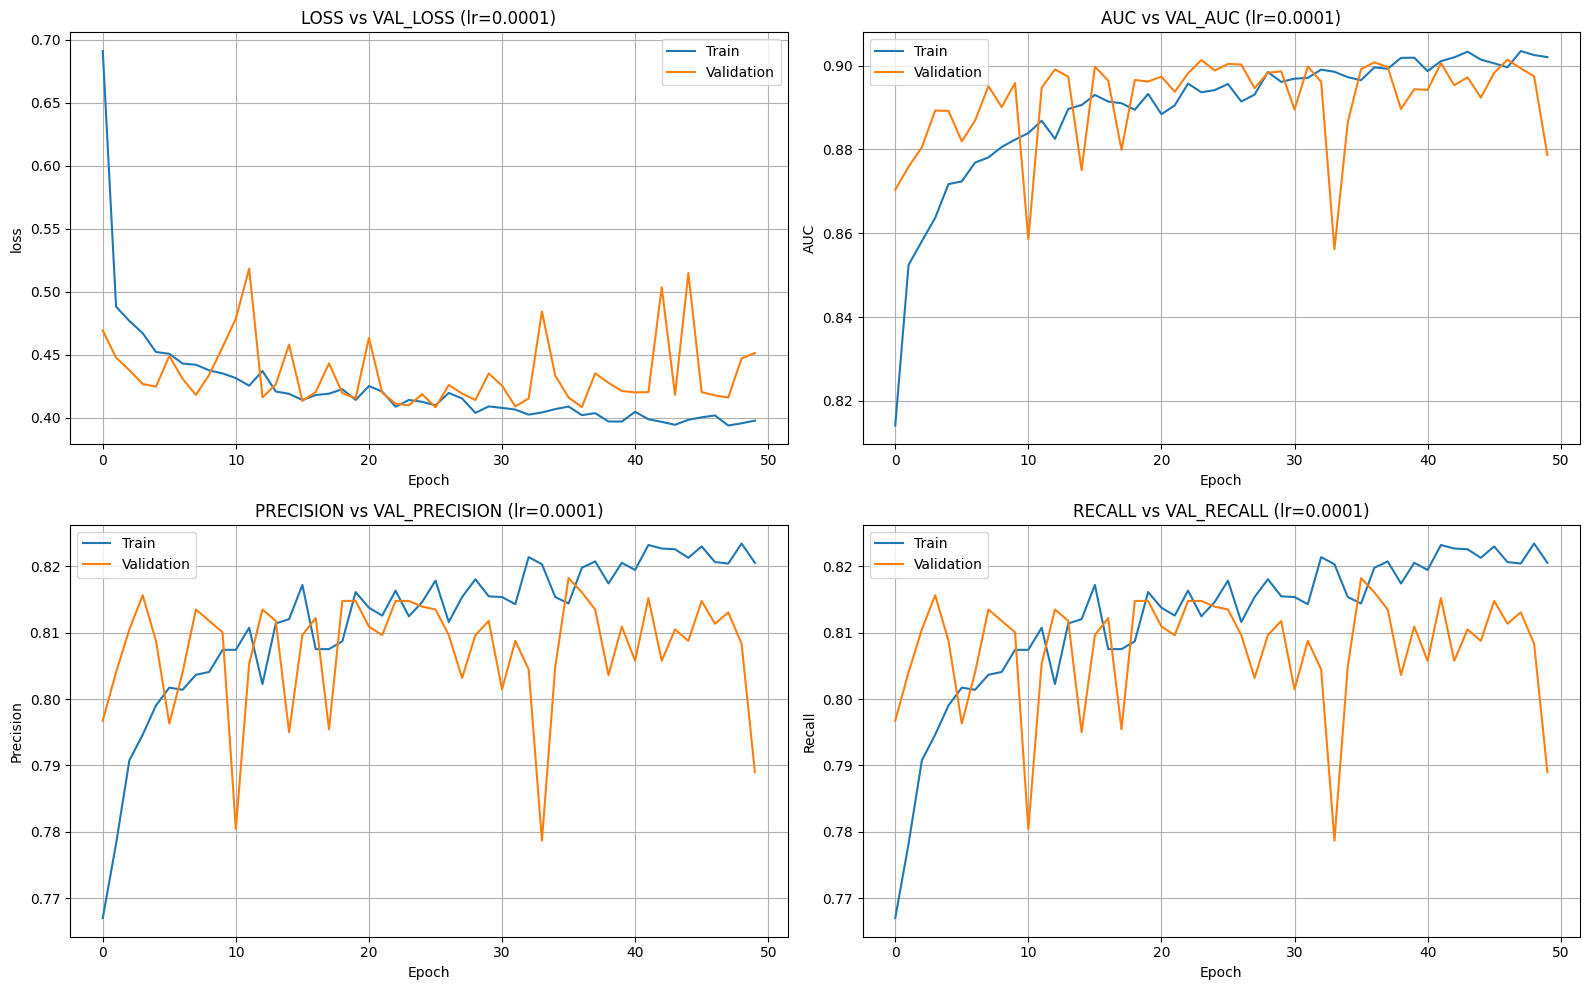


🏆 Best learning rate: 0.001


In [19]:
learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Train
for lr in learning_rates:
    print(f"\n Training model with learning rate: {lr}")
    model=build_dual_branch_nn(common_dim=X_common.shape[1], specific_dim=X_spec.shape[1], learning_rate=lr)
    
    
    
    history = model.fit(
        [X_common_train, X_spec_train], y_train_encoded,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        #callbacks=[early_stopping],
        verbose=0
    )
    
    print("✅ Training completed.")
    

    final_val_auc = max(history.history['val_AUC'])
    histories[lr] = history
    
    if final_val_auc > best_auc:
        best_auc = final_val_auc
        best_model = model
        best_lr= lr

# Plotting
for lr, hist in histories.items():
    plot_history(hist, lr)

print(f"\n🏆 Best learning rate: {best_lr}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


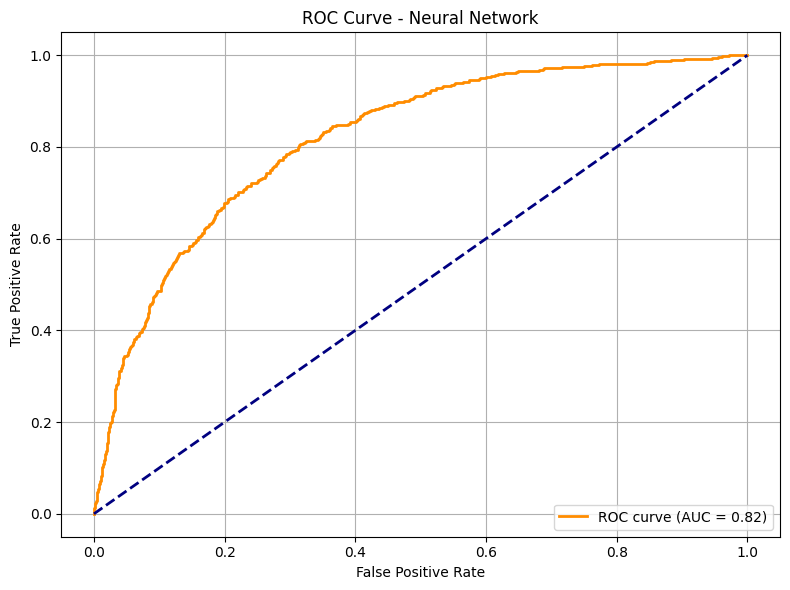

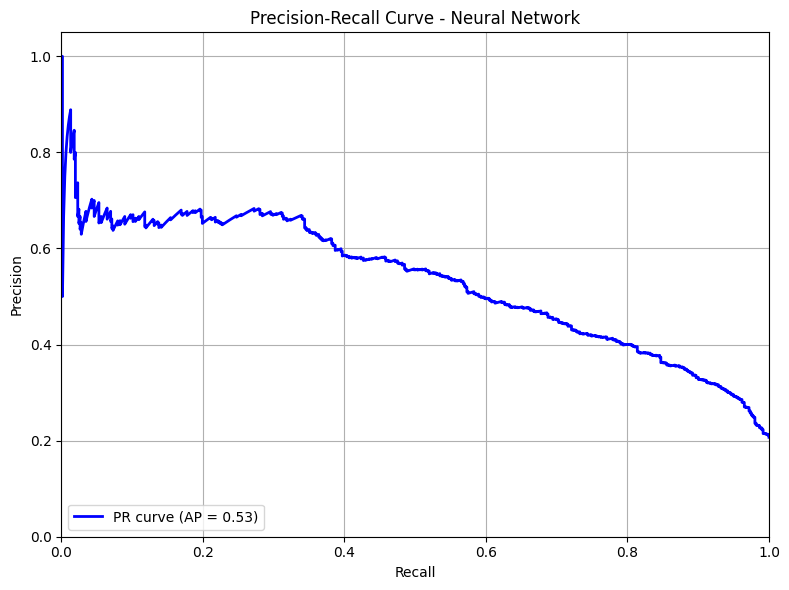

In [20]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# Use best model
y_proba_nn_A = best_model.predict([X_common_test, X_spec_test])[:, 1]  # flatten (n,1) → (n,)

# === Get true labels ===
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# === ROC Curve ===
fpr_nn_A, tpr_nn_A, thresholds_roc_nn_A = roc_curve(y_true, y_proba_nn_A)
roc_auc_nn_A = auc(fpr_nn_A, tpr_nn_A)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn_A, tpr_nn_A, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn_A:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall Curve ===
precision_nn_A, recall_nn_A, thresholds_pr_nn_A = precision_recall_curve(y_true, y_proba_nn_A)
avg_precision_nn_A = average_precision_score(y_true, y_proba_nn_A)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn_A, precision_nn_A, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_nn_A:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

### Dual Branch: Dataset B

In [21]:
"""# Common attributes (keep these in both dfA and dfB)
common_attributes = [
    'subject_id', 'hadm_id', 'gender', 'age', 'weight_kg', 'gcs', 
    'cardiovascular', 'neurological', 'pulmonary', 'diabetes', 
    'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', 
    'autoimmune', 'mortality_1yr'
]

# Set A specific attributes
set_A_attributes = [
    'temperature', 'respiratory_rate', 'heart_rate', 'nbp_systolic', 
    'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph'
]

# Set B specific attributes
set_B_attributes = [
    'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', 
    'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', 
    'platelet_count', 'inr', 'pt', 'ptt'
]"""

"# Common attributes (keep these in both dfA and dfB)\ncommon_attributes = [\n    'subject_id', 'hadm_id', 'gender', 'age', 'weight_kg', 'gcs', \n    'cardiovascular', 'neurological', 'pulmonary', 'diabetes', \n    'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', \n    'autoimmune', 'mortality_1yr'\n]\n\n# Set A specific attributes\nset_A_attributes = [\n    'temperature', 'respiratory_rate', 'heart_rate', 'nbp_systolic', \n    'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph'\n]\n\n# Set B specific attributes\nset_B_attributes = [\n    'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', \n    'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', \n    'platelet_count', 'inr', 'pt', 'ptt'\n]"

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

id_columns_B = dfB[['subject_id', 'hadm_id']]
X_common = dfB.drop(columns=set_B_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
X_spec = dfB[set_B_attributes]
y = dfB['mortality_1yr']


X_common_train, X_common_test, X_spec_train, X_spec_test, y_train, y_test, id_train, id_test = train_test_split(
    X_common, X_spec, y, id_columns_B,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded = to_categorical(y_train)

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

def build_dual_branch_nn(common_dim, specific_dim,learning_rate):
    # Common branch 
    common_input = Input(shape=(common_dim,), name='common_input')
    x_common = layers.Dense(256, activation='relu')(common_input)
    x_common = layers.Dense(128, activation='relu')(x_common)
    x_common = layers.Dense(64, activation='relu')(x_common)

    #Specific branch
    specific_input = Input(shape=(specific_dim,), name='specific_input')
    x_spec = layers.Dense(256, activation='relu')(specific_input)
    x_spec = layers.Dense(128, activation='relu')(x_spec)
    x_spec = layers.Dense(64, activation='relu')(x_spec)

    # --- Concatenate ---
    x = layers.Concatenate(name='concat')([x_common, x_spec])
    output = layers.Dense(2, activation='softmax', name='output')(x)

    # --- Model ---
    model = models.Model(inputs=[common_input, specific_input], outputs=output)

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['AUC', 'Precision', 'Recall']
    )
    return model


In [24]:
import matplotlib.pyplot as plt
def plot_history(history, lr):
    keys = history.history.keys()
    print(f"\n📊 Plotting for learning rate: {lr}")
    print("🧪 History keys:", keys)

    plt.figure(figsize=(16, 10))

    plots = [
        ('loss', 'val_loss'),
        ('AUC', 'val_AUC'),
        ('Precision', 'val_Precision'),
        ('Recall', 'val_Recall')
    ]

    for i, (train_metric, val_metric) in enumerate(plots):
        if train_metric in keys and val_metric in keys:
            plt.subplot(2, 2, i + 1)
            plt.plot(history.history[train_metric], label='Train')
            plt.plot(history.history[val_metric], label='Validation')
            plt.title(f"{train_metric.upper()} vs {val_metric.upper()} (lr={lr})")
            plt.xlabel("Epoch")
            plt.ylabel(train_metric)
            plt.legend()
            plt.grid(True)

    plt.tight_layout()
    plt.show()


 Training model with learning rate: 0.01
✅ Training completed.

 Training model with learning rate: 0.001
✅ Training completed.

 Training model with learning rate: 0.0001
✅ Training completed.

📊 Plotting for learning rate: 0.01
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


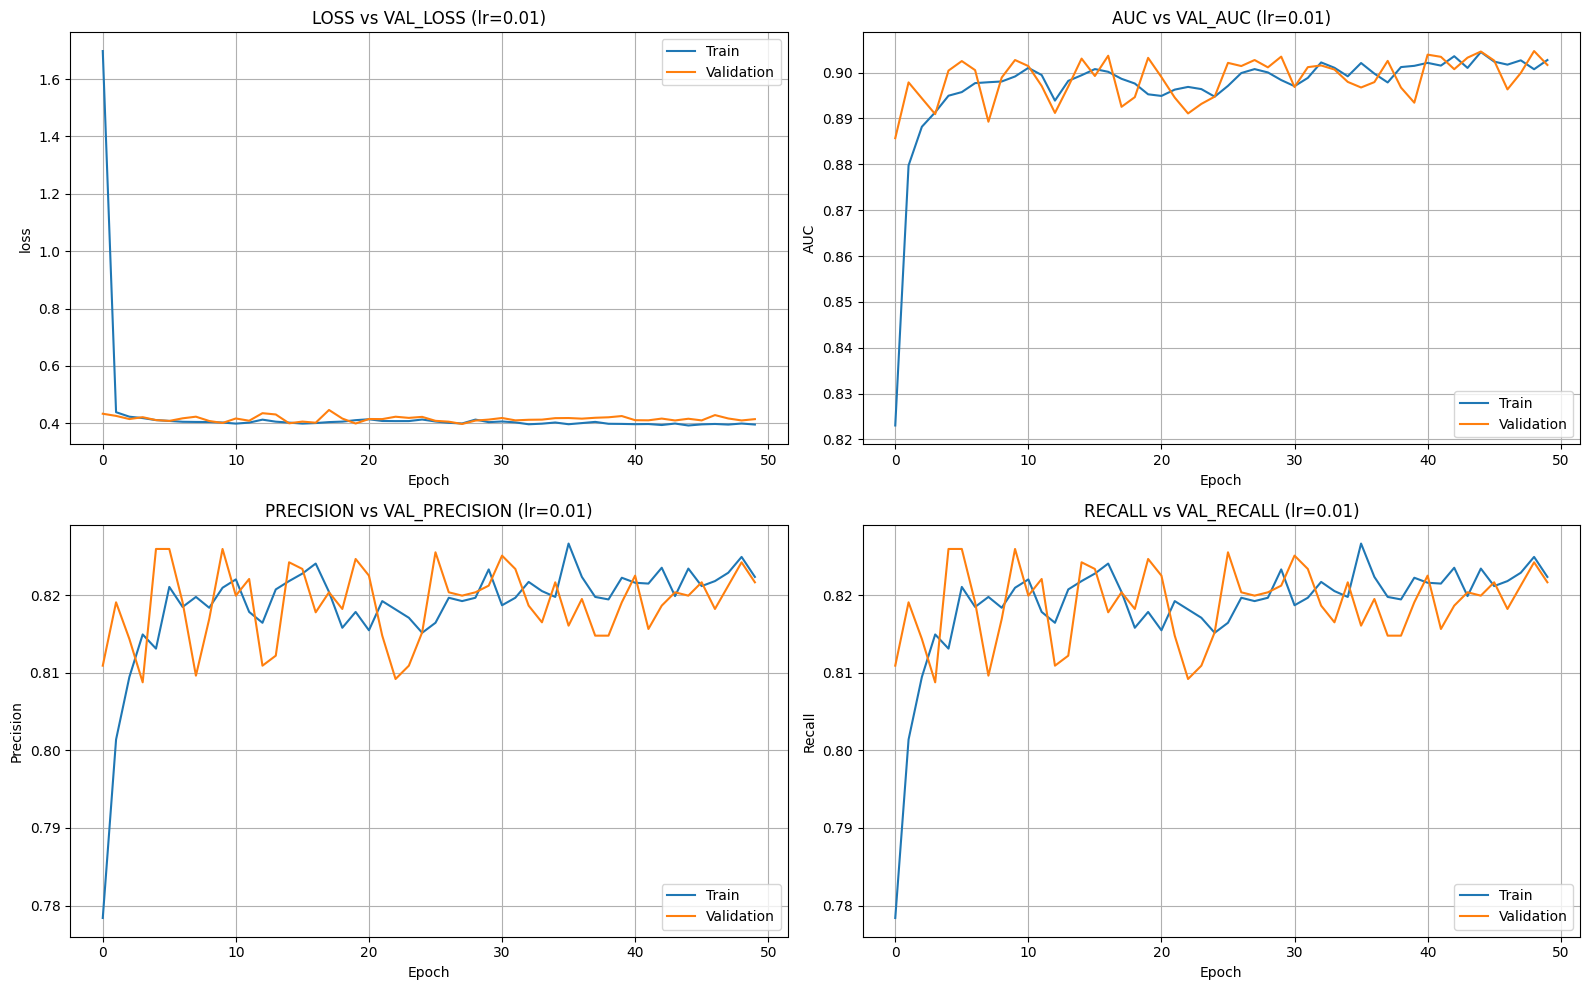


📊 Plotting for learning rate: 0.001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


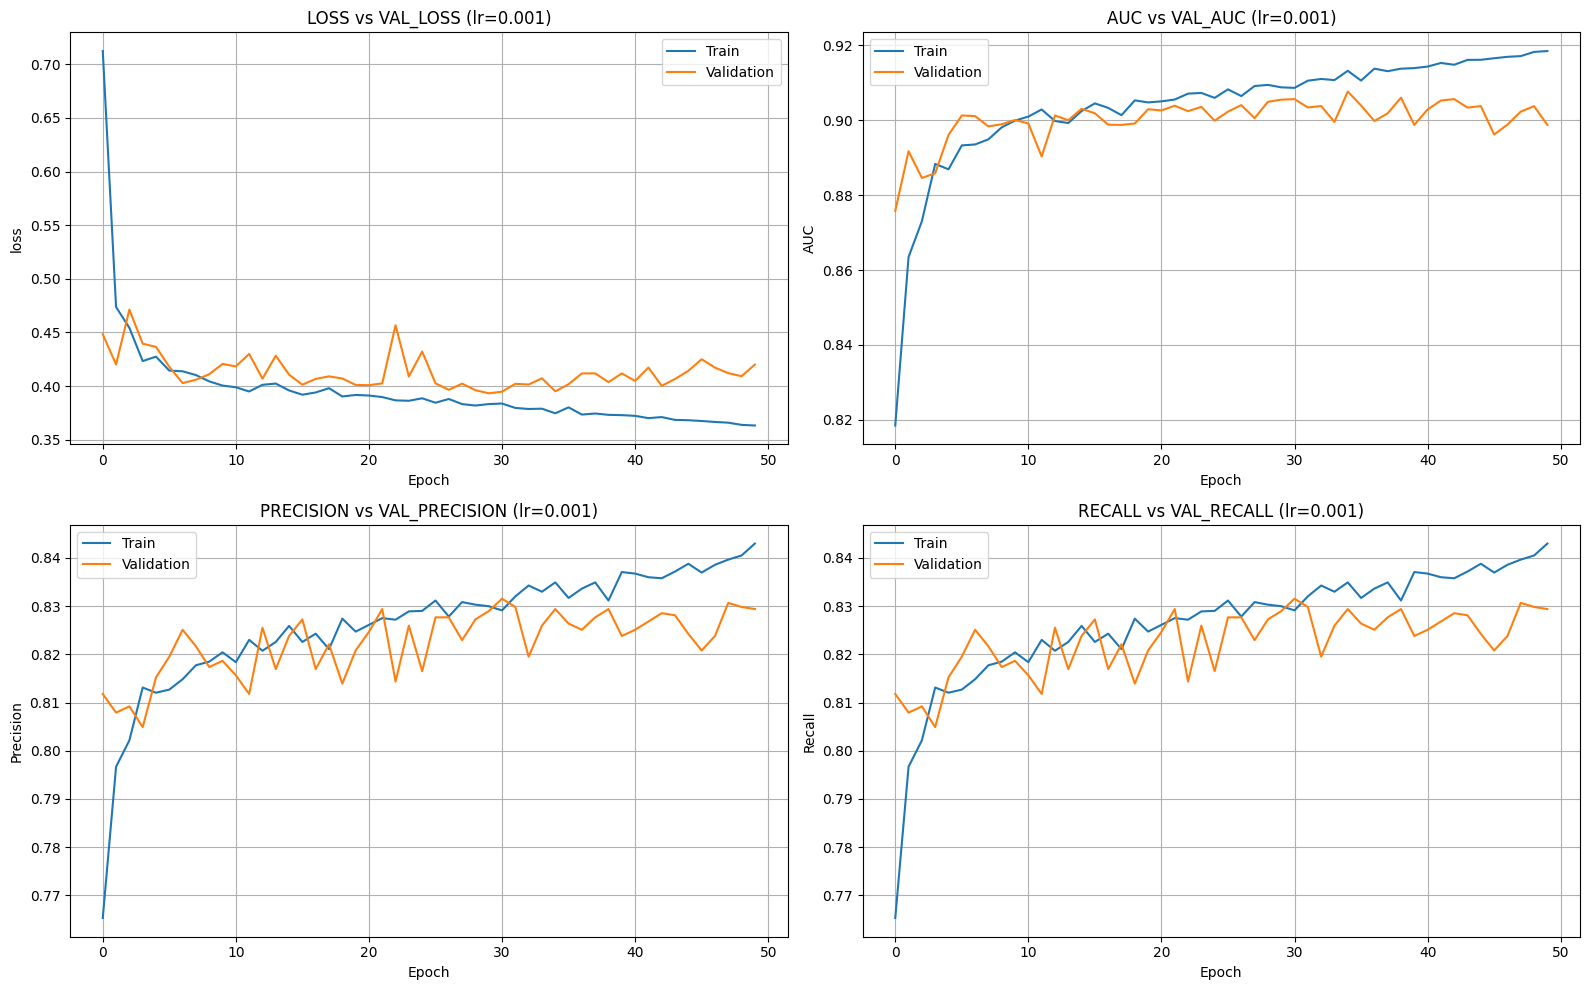


📊 Plotting for learning rate: 0.0001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


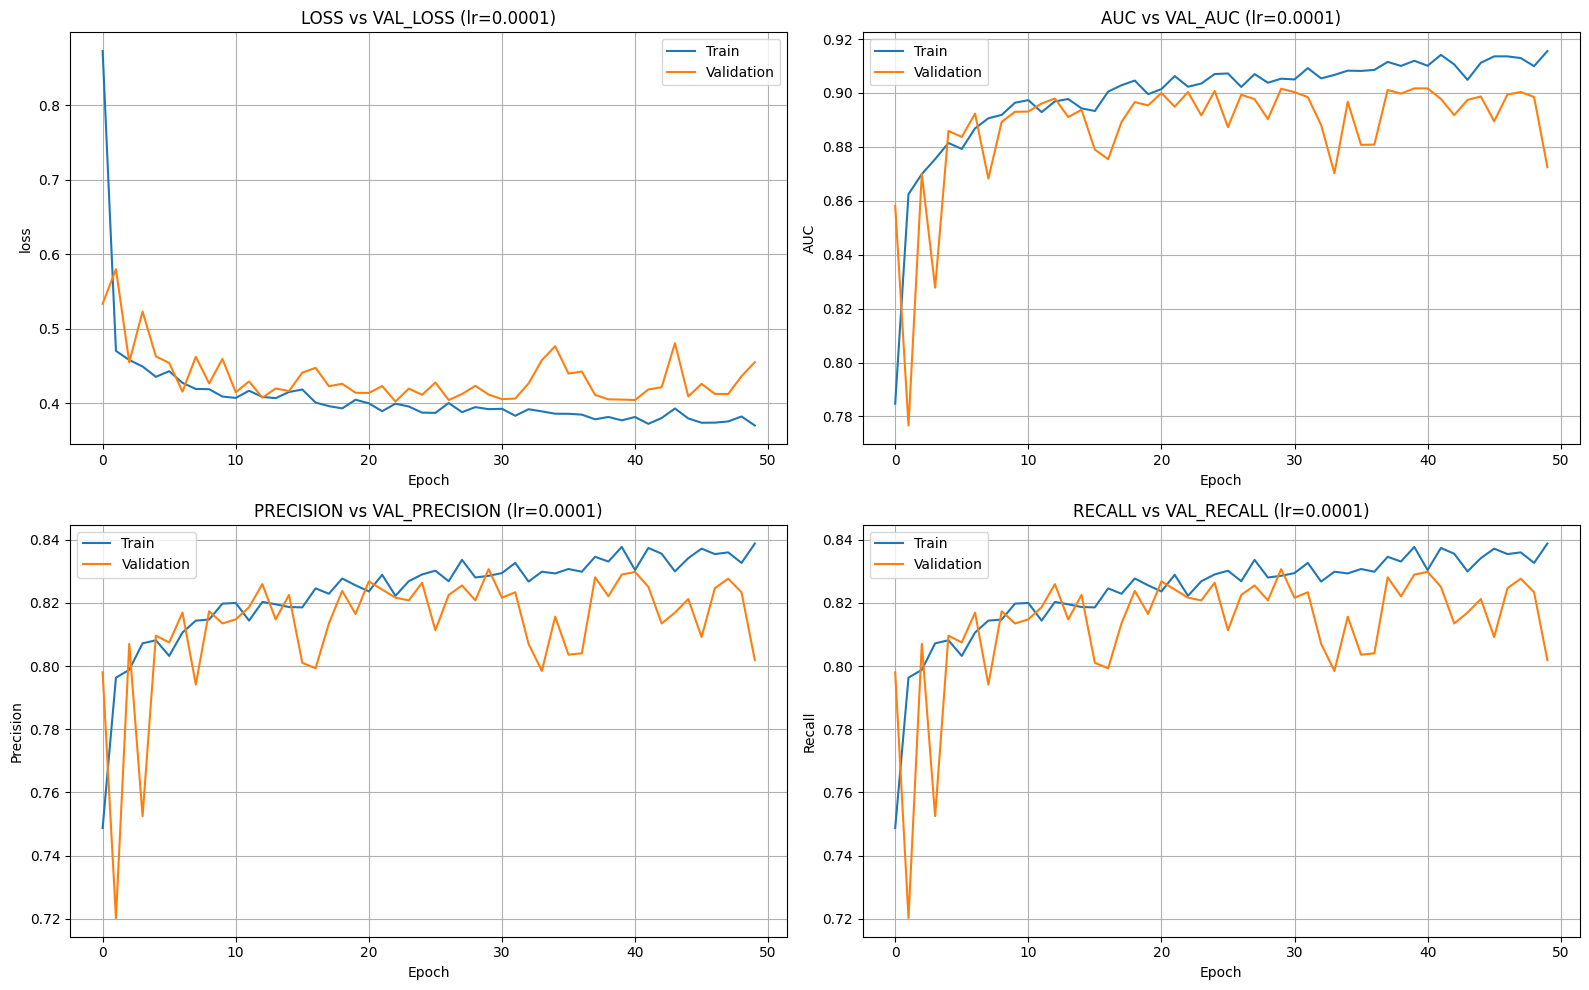


🏆 Best learning rate: 0.001


In [25]:
learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Train
for lr in learning_rates:
    print(f"\n Training model with learning rate: {lr}")
    model=build_dual_branch_nn(common_dim=X_common.shape[1], specific_dim=X_spec.shape[1], learning_rate=lr)
    
    
    
    history = model.fit(
        [X_common_train, X_spec_train], y_train_encoded,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        #callbacks=[early_stopping],
        verbose=0
    )
    
    print("✅ Training completed.")
    

    final_val_auc = max(history.history['val_AUC'])
    histories[lr] = history
    
    if final_val_auc > best_auc:
        best_auc = final_val_auc
        best_model = model
        best_lr= lr

# Plotting
for lr, hist in histories.items():
    plot_history(hist, lr)

print(f"\n🏆 Best learning rate: {best_lr}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


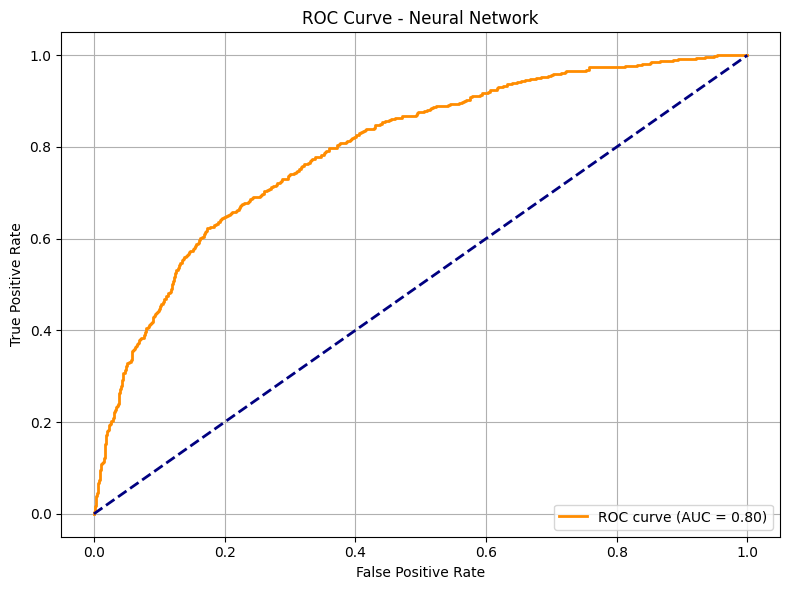

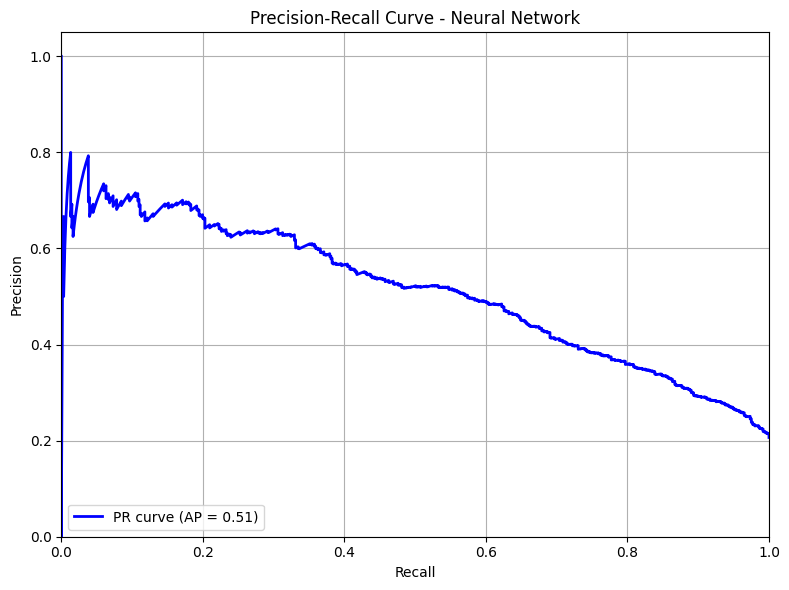

In [26]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# Use best model
y_proba_nn_B = best_model.predict([X_common_test, X_spec_test])[:, 1]  # flatten (n,1) → (n,)

# === Get true labels ===
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# === ROC Curve ===
fpr_nn_B, tpr_nn_B, thresholds_roc_nn_B = roc_curve(y_true, y_proba_nn_B)
roc_auc_nn_B = auc(fpr_nn_B, tpr_nn_B)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn_B, tpr_nn_B, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn_B:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall Curve ===
precision_nn_B, recall_nn_B, thresholds_pr_nn_B = precision_recall_curve(y_true, y_proba_nn_B)
avg_precision_nn_B = average_precision_score(y_true, y_proba_nn_B)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn_B, precision_nn_B, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_nn_B:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

### Both Datasets: shared and private encoder

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

id_columns_A = dfA[['subject_id', 'hadm_id']]
X_common_A = dfA.drop(columns=set_A_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
X_spec_A = dfA[set_A_attributes]
y_A = dfA['mortality_1yr']


X_common_train_A, X_common_test_A, X_spec_train_A, X_spec_test_A, y_train_A, y_test_A, id_train_A, id_test_A = train_test_split(
    X_common_A, X_spec_A, y_A, id_columns_A,
    test_size=0.2,
    random_state=42,
    stratify=y_A
)

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded_A = to_categorical(y_train_A)

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

id_columns_B = dfB[['subject_id', 'hadm_id']]
X_common_B = dfB.drop(columns=set_B_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
X_spec_B = dfB[set_B_attributes]
y_B = dfB['mortality_1yr']


X_common_train_B, X_common_test_B, X_spec_train_B, X_spec_test_B, y_train_B, y_test_B, id_train_B, id_test_B = train_test_split(
    X_common_B, X_spec_B, y_B, id_columns_B,
    test_size=0.2,
    random_state=42,
    stratify=y_B
)

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded_B = to_categorical(y_train_B)

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

def build_nn_with_shared_encoder_for_common(common_dim, specific_dim_A, specific_dim_B, learning_rate):
    
    # 1. Improved Shared Encoder with BatchNormalization
    def shared_encoder_block():
        inputs = Input(shape=(common_dim,))
        x = layers.Dense(256)(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Dropout(0.3)(x)
        
        x = layers.Dense(128)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        
        # Output latent representation
        out = layers.Dense(64, activation='relu')(x)
        return models.Model(inputs, out, name="shared_encoder")

    shared_encoder = shared_encoder_block()

    # 2. Private Encoders
    def private_encoder(input_dim, name):
        inputs = Input(shape=(input_dim,))
        x = layers.Dense(128, activation='relu')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(64, activation='relu')(x)
        return models.Model(inputs, x, name=name)

    private_A = private_encoder(specific_dim_A, "private_A")
    private_B = private_encoder(specific_dim_B, "private_B")

    # --- Inputs ---
    input_common_A = Input(shape=(common_dim,), name='X_common_A')
    input_spec_A   = Input(shape=(specific_dim_A,), name='X_spec_A')
    input_common_B = Input(shape=(common_dim,), name='X_common_B')
    input_spec_B   = Input(shape=(specific_dim_B,), name='X_spec_B')

    # --- Forward pass ---
    h_common_A = shared_encoder(input_common_A)
    h_common_B = shared_encoder(input_common_B)

    h_spec_A = private_A(input_spec_A)
    h_spec_B = private_B(input_spec_B)

    # --- Concatenation + Dense Layer before Softmax ---
    # Adding one more layer after concatenation helps the model "fuse" the shared/private info
    def classifier_head(h_shared, h_private, name):
        concat = layers.Concatenate()([h_shared, h_private])
        x = layers.Dense(64, activation='relu')(concat)
        x = layers.Dropout(0.2)(x)
        return layers.Dense(2, activation='softmax', name=name)(x)

    y_A = classifier_head(h_common_A, h_spec_A, "y_A")
    y_B = classifier_head(h_common_B, h_spec_B, "y_B")

    model = models.Model(
        inputs=[input_common_A, input_spec_A, input_common_B, input_spec_B],
        outputs=[y_A, y_B]
    )

    # --- Compile ---
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss={
            "y_A": "categorical_crossentropy",
            "y_B": "categorical_crossentropy"
        },
        metrics={
            "y_A": [AUC(name='AUC_A'), Precision(name='Precision_A'), Recall(name='Recall_A')],
            "y_B": [AUC(name='AUC_B'), Precision(name='Precision_B'), Recall(name='Recall_B')]
        }
    )

    return model

In [30]:
print(history.history.keys())


dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


In [31]:
import matplotlib.pyplot as plt
def plot_history(history, lr):
    keys = history.history.keys()
    print(f"\n📊 Plotting for learning rate: {lr}")
    print("🧪 History keys:", keys)

    plt.figure(figsize=(16, 10))

    plots = [
        ('loss', 'val_loss'),
        ('AUC', 'val_AUC'),
        ('Precision', 'val_Precision'),
        ('Recall', 'val_Recall')
    ]

    for i, (train_metric, val_metric) in enumerate(plots):
        if train_metric in keys and val_metric in keys:
            plt.subplot(2, 2, i + 1)
            plt.plot(history.history[train_metric], label='Train')
            plt.plot(history.history[val_metric], label='Validation')
            plt.title(f"{train_metric.upper()} vs {val_metric.upper()} (lr={lr})")
            plt.xlabel("Epoch")
            plt.ylabel(train_metric)
            plt.legend()
            plt.grid(True)

    plt.tight_layout()
    plt.show()


 Training model with learning rate: 0.01
✅ Training completed.

 Training model with learning rate: 0.001
✅ Training completed.

 Training model with learning rate: 0.0001
✅ Training completed.

📊 Plotting for learning rate: 0.01
🧪 History keys: dict_keys(['loss', 'val_loss', 'val_y_A_AUC_A', 'val_y_A_Precision_A', 'val_y_A_Recall_A', 'val_y_A_loss', 'val_y_B_AUC_B', 'val_y_B_Precision_B', 'val_y_B_Recall_B', 'val_y_B_loss', 'y_A_AUC_A', 'y_A_Precision_A', 'y_A_Recall_A', 'y_A_loss', 'y_B_AUC_B', 'y_B_Precision_B', 'y_B_Recall_B', 'y_B_loss'])


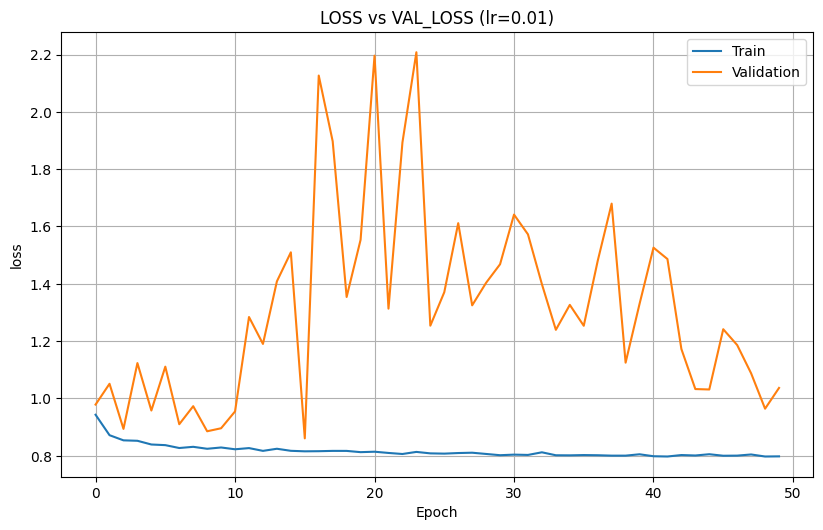


📊 Plotting for learning rate: 0.001
🧪 History keys: dict_keys(['loss', 'val_loss', 'val_y_A_AUC_A', 'val_y_A_Precision_A', 'val_y_A_Recall_A', 'val_y_A_loss', 'val_y_B_AUC_B', 'val_y_B_Precision_B', 'val_y_B_Recall_B', 'val_y_B_loss', 'y_A_AUC_A', 'y_A_Precision_A', 'y_A_Recall_A', 'y_A_loss', 'y_B_AUC_B', 'y_B_Precision_B', 'y_B_Recall_B', 'y_B_loss'])


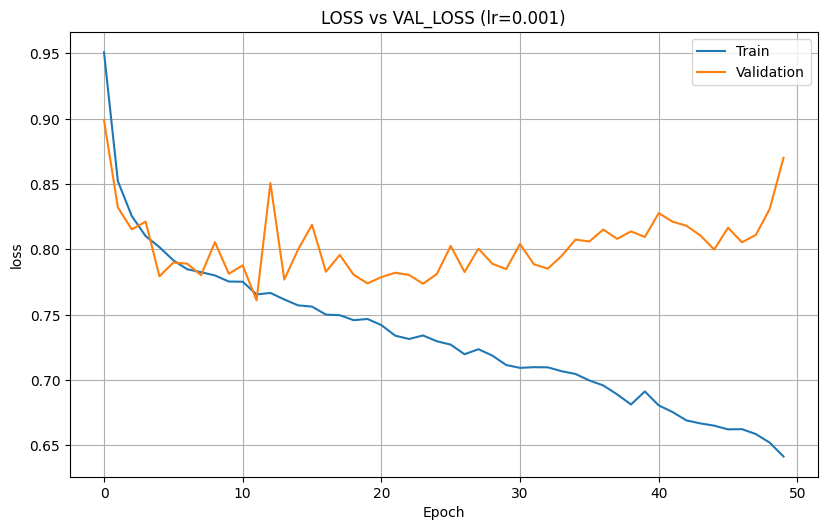


📊 Plotting for learning rate: 0.0001
🧪 History keys: dict_keys(['loss', 'val_loss', 'val_y_A_AUC_A', 'val_y_A_Precision_A', 'val_y_A_Recall_A', 'val_y_A_loss', 'val_y_B_AUC_B', 'val_y_B_Precision_B', 'val_y_B_Recall_B', 'val_y_B_loss', 'y_A_AUC_A', 'y_A_Precision_A', 'y_A_Recall_A', 'y_A_loss', 'y_B_AUC_B', 'y_B_Precision_B', 'y_B_Recall_B', 'y_B_loss'])


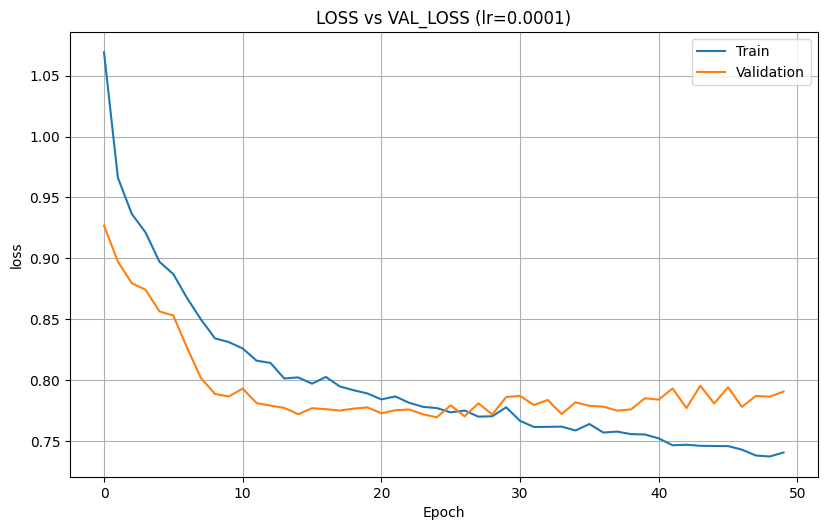


🏆 Best learning rate: 0.0001


In [32]:
learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Train
for lr in learning_rates:
    print(f"\n Training model with learning rate: {lr}")
    model=build_nn_with_shared_encoder_for_common(common_dim=X_common_A.shape[1], specific_dim_A=X_spec_A.shape[1],specific_dim_B=X_spec_B.shape[1], learning_rate=lr)
    
    
    
    history = model.fit(
        x={
            "X_common_A": X_common_train_A,
            "X_spec_A": X_spec_train_A,
            "X_common_B": X_common_train_B,
            "X_spec_B": X_spec_train_B,
        },
        y={
            "y_A": y_train_encoded_A,
            "y_B": y_train_encoded_B,
        },
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        #callbacks=[early_stopping],
        verbose=0
    )
    
    print("✅ Training completed.")
    

    final_val_auc = max(history.history['val_y_A_AUC_A'])
    final_val_auc_B = max(history.history['val_y_B_AUC_B'])


    histories[lr] = history
    
    if final_val_auc > best_auc:
        best_auc = final_val_auc
        best_model = model
        best_lr= lr

# Plotting
for lr, hist in histories.items():
    plot_history(hist, lr)

print(f"\n🏆 Best learning rate: {best_lr}")

In [33]:
# --- Function to plot ROC and PR ---
def plot_roc_pr(y_true, y_proba, domain_name):
    # ROC
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {domain_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    avg_precision = average_precision_score(y_true, y_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {domain_name}')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.tight_layout()
    plt.show()

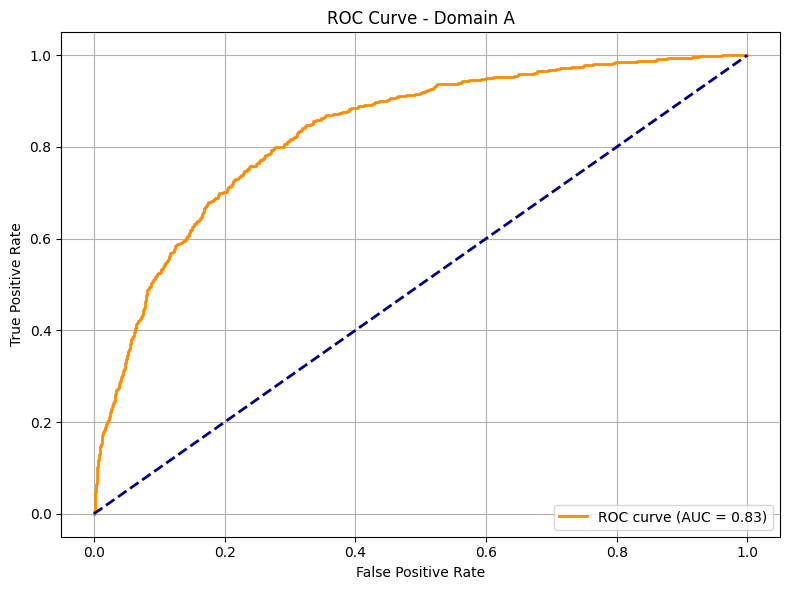

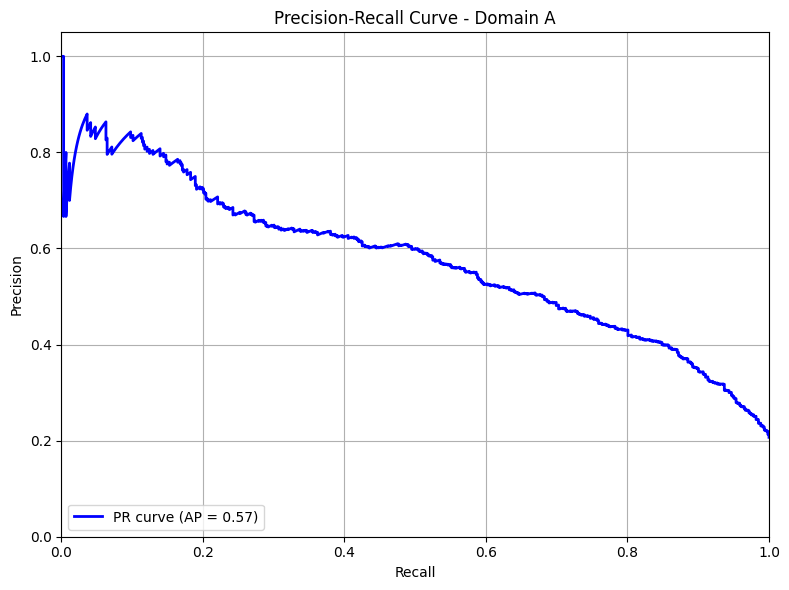

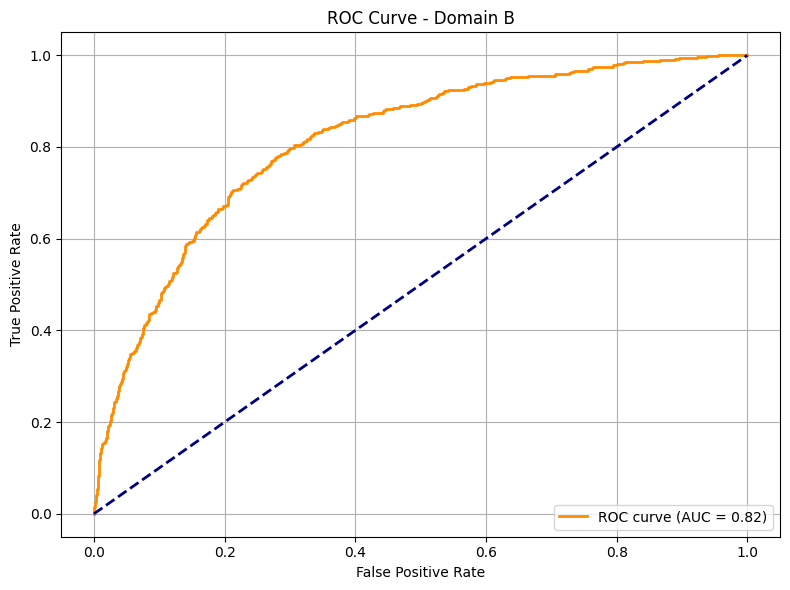

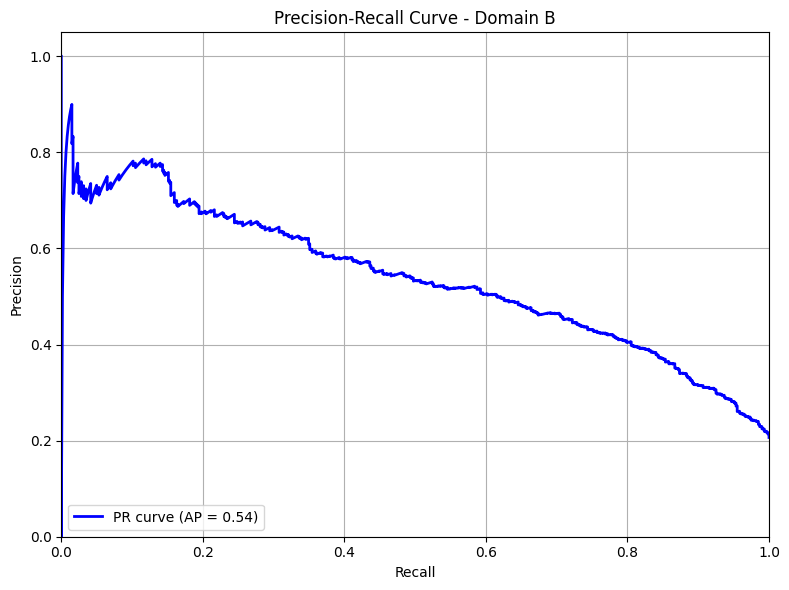

In [34]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# --- Get predictions for both outputs ---
y_pred_list = best_model.predict(
    [X_common_test_A, X_spec_test_A, X_common_test_B, X_spec_test_B],
    verbose=0
)
y_proba_shared_A = y_pred_list[0][:, 1]
y_proba_shared_B = y_pred_list[1][:, 1]

# --- Get true labels ---
if y_test_A.ndim > 1 and y_test_A.shape[1] > 1:
    y_true_shared_A = np.argmax(y_test_A, axis=1)
else:
    y_true_shared_A = y_test_A

if y_test_B.ndim > 1 and y_test_B.shape[1] > 1:
    y_true_shared_B = np.argmax(y_test_B, axis=1)
else:
    y_true_shared_B = y_test_B

# === DOMAIN A ===
# ROC
fpr_shared_A, tpr_shared_A, thresholds_roc_shared_A = roc_curve(y_true_shared_A, y_proba_shared_A)
roc_auc_shared_A = auc(fpr_shared_A, tpr_shared_A)

plt.figure(figsize=(8, 6))
plt.plot(fpr_shared_A, tpr_shared_A, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_shared_A:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Domain A')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# PR
precision_shared_A, recall_shared_A, thresholds_pr_shared_A = precision_recall_curve(y_true_shared_A, y_proba_shared_A)
avg_precision_shared_A = average_precision_score(y_true_shared_A, y_proba_shared_A)

plt.figure(figsize=(8, 6))
plt.plot(recall_shared_A, precision_shared_A, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_shared_A:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Domain A')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

# === DOMAIN B ===
# ROC
fpr_shared_B, tpr_shared_B, thresholds_roc_shared_B = roc_curve(y_true_shared_B, y_proba_shared_B)
roc_auc_shared_B = auc(fpr_shared_B, tpr_shared_B)

plt.figure(figsize=(8, 6))
plt.plot(fpr_shared_B, tpr_shared_B, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_shared_B:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Domain B')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# PR
precision_shared_B, recall_shared_B, thresholds_pr_shared_B = precision_recall_curve(y_true_shared_B, y_proba_shared_B)
avg_precision_shared_B = average_precision_score(y_true_shared_B, y_proba_shared_B)

plt.figure(figsize=(8, 6))
plt.plot(recall_shared_B, precision_shared_B, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_shared_B:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Domain B')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()


### Private encoder only with specific columns

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

id_columns_A = dfA[['subject_id', 'hadm_id']]
X_common_A = dfA.drop(columns=set_A_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
X_spec_A = dfA[set_A_attributes]
y_A = dfA['mortality_1yr']


X_common_train_A, X_common_test_A, X_spec_train_A, X_spec_test_A, y_train_A, y_test_A, id_train_A, id_test_A = train_test_split(
    X_common_A, X_spec_A, y_A, id_columns_A,
    test_size=0.2,
    random_state=42,
    stratify=y_A
)

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded_A = to_categorical(y_train_A)

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

id_columns_B = dfB[['subject_id', 'hadm_id']]
X_common_B = dfB.drop(columns=set_B_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
X_spec_B = dfB[set_B_attributes]
y_B = dfB['mortality_1yr']


X_common_train_B, X_common_test_B, X_spec_train_B, X_spec_test_B, y_train_B, y_test_B, id_train_B, id_test_B = train_test_split(
    X_common_B, X_spec_B, y_B, id_columns_B,
    test_size=0.2,
    random_state=42,
    stratify=y_B
)

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded_B = to_categorical(y_train_B)

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

def build_nn_private_only(specific_dim_A, specific_dim_B, learning_rate):


    # --- Private encoders (independent architectures) ---
    def private_encoder_block(input_dim, name):
        model = models.Sequential(name=name)
        model.add(layers.Dense(256, activation='relu'))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(64, activation='relu'))
        return model

    private_A = private_encoder_block(specific_dim_A, "private_A")
    private_B = private_encoder_block(specific_dim_B, "private_B")

    # --- Inputs ---
    X_spec_A   = Input(shape=(specific_dim_A,), name='X_spec_A')
    X_spec_B   = Input(shape=(specific_dim_B,), name='X_spec_B')

    # --- Forward passes ---

    h_spec_A = private_A(X_spec_A)
    h_spec_B = private_B(X_spec_B)


    # --- Domain-specific classifiers ---
    y_A = layers.Dense(2, activation='softmax', name='y_A')(h_spec_A)
    y_B = layers.Dense(2, activation='softmax', name='y_B')(h_spec_B)

    # --- Build model ---
    model = models.Model(
        inputs=[X_spec_A, X_spec_B],
        outputs=[y_A, y_B],
        name="nn_private_only"
    )

    # --- Compile ---
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss={
            "y_A": "categorical_crossentropy",
            "y_B": "categorical_crossentropy"
        },
        metrics={
            "y_A": [AUC(name='AUC_A'), Precision(name='Precision_A'), Recall(name='Recall_A')],
            "y_B": [AUC(name='AUC_B'), Precision(name='Precision_B'), Recall(name='Recall_B')]
        }
    )

    return model


In [38]:
import matplotlib.pyplot as plt
def plot_history(history, lr):
    keys = history.history.keys()
    print(f"\n📊 Plotting for learning rate: {lr}")
    print("🧪 History keys:", keys)

    plt.figure(figsize=(16, 10))

    plots = [
        ('loss', 'val_loss'),
        ('AUC', 'val_AUC'),
        ('Precision', 'val_Precision'),
        ('Recall', 'val_Recall')
    ]

    for i, (train_metric, val_metric) in enumerate(plots):
        if train_metric in keys and val_metric in keys:
            plt.subplot(2, 2, i + 1)
            plt.plot(history.history[train_metric], label='Train')
            plt.plot(history.history[val_metric], label='Validation')
            plt.title(f"{train_metric.upper()} vs {val_metric.upper()} (lr={lr})")
            plt.xlabel("Epoch")
            plt.ylabel(train_metric)
            plt.legend()
            plt.grid(True)

    plt.tight_layout()
    plt.show()


 Training model with learning rate: 0.01
✅ Training completed.

 Training model with learning rate: 0.001
✅ Training completed.

 Training model with learning rate: 0.0001
✅ Training completed.

📊 Plotting for learning rate: 0.01
🧪 History keys: dict_keys(['loss', 'val_loss', 'val_y_A_AUC_A', 'val_y_A_Precision_A', 'val_y_A_Recall_A', 'val_y_A_loss', 'val_y_B_AUC_B', 'val_y_B_Precision_B', 'val_y_B_Recall_B', 'val_y_B_loss', 'y_A_AUC_A', 'y_A_Precision_A', 'y_A_Recall_A', 'y_A_loss', 'y_B_AUC_B', 'y_B_Precision_B', 'y_B_Recall_B', 'y_B_loss'])


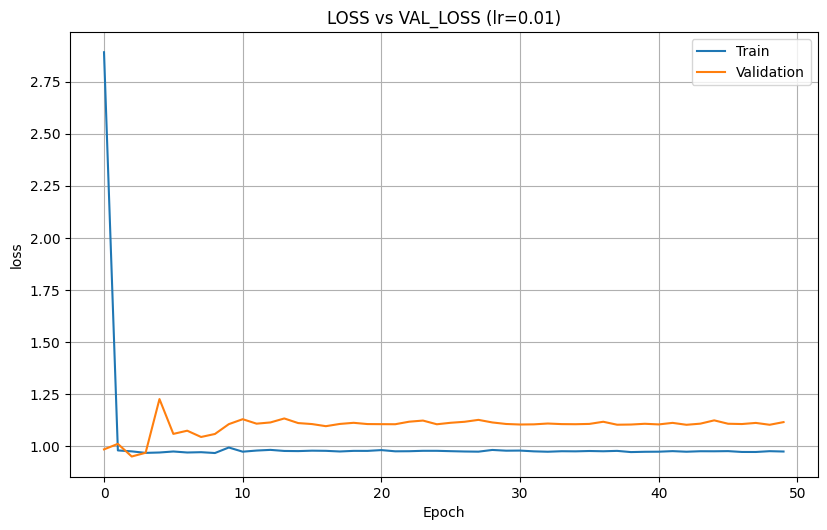


📊 Plotting for learning rate: 0.001
🧪 History keys: dict_keys(['loss', 'val_loss', 'val_y_A_AUC_A', 'val_y_A_Precision_A', 'val_y_A_Recall_A', 'val_y_A_loss', 'val_y_B_AUC_B', 'val_y_B_Precision_B', 'val_y_B_Recall_B', 'val_y_B_loss', 'y_A_AUC_A', 'y_A_Precision_A', 'y_A_Recall_A', 'y_A_loss', 'y_B_AUC_B', 'y_B_Precision_B', 'y_B_Recall_B', 'y_B_loss'])


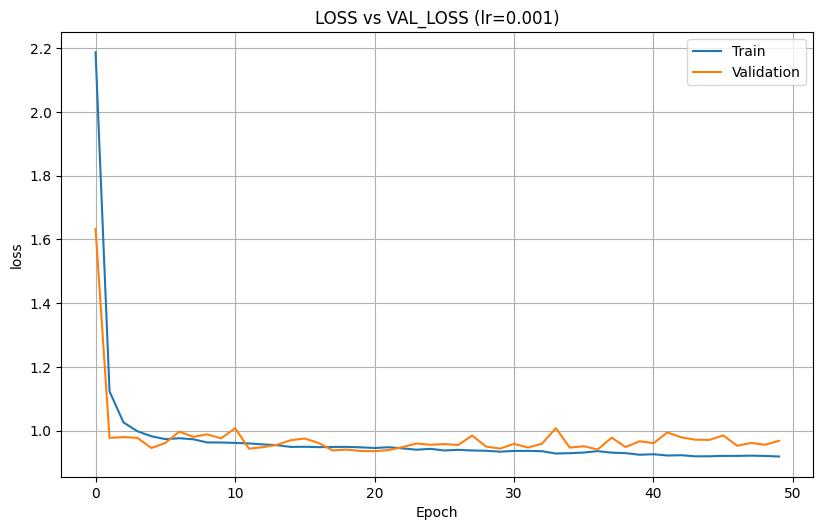


📊 Plotting for learning rate: 0.0001
🧪 History keys: dict_keys(['loss', 'val_loss', 'val_y_A_AUC_A', 'val_y_A_Precision_A', 'val_y_A_Recall_A', 'val_y_A_loss', 'val_y_B_AUC_B', 'val_y_B_Precision_B', 'val_y_B_Recall_B', 'val_y_B_loss', 'y_A_AUC_A', 'y_A_Precision_A', 'y_A_Recall_A', 'y_A_loss', 'y_B_AUC_B', 'y_B_Precision_B', 'y_B_Recall_B', 'y_B_loss'])


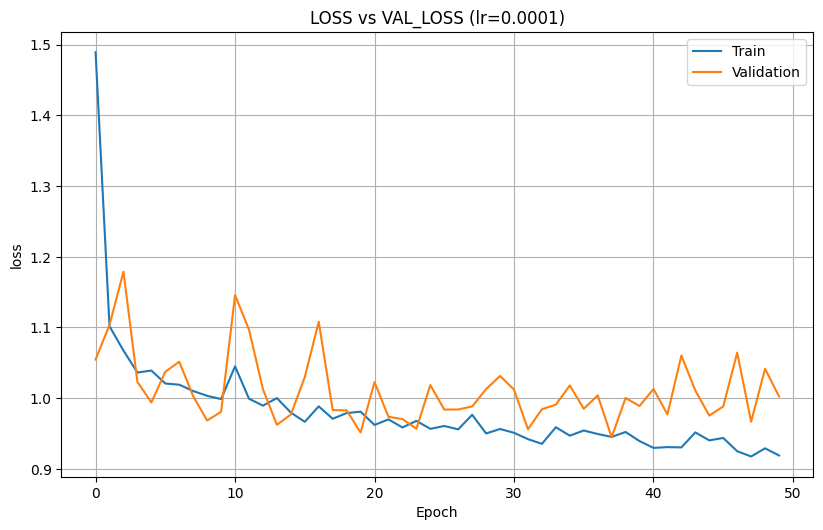


🏆 Best learning rate: 0.001


In [39]:
learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Train
for lr in learning_rates:
    print(f"\n Training model with learning rate: {lr}")
    model=build_nn_private_only(specific_dim_A=X_spec_A.shape[1],specific_dim_B=X_spec_B.shape[1], learning_rate=lr)
    
    
    
    history = model.fit(
        x={

            "X_spec_A": X_spec_train_A,
            "X_spec_B": X_spec_train_B,
        },
        y={
            "y_A": y_train_encoded_A,
            "y_B": y_train_encoded_B,
        },
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        #callbacks=[early_stopping],
        verbose=0
    )
    
    print("✅ Training completed.")
    

    final_val_auc = max(history.history['val_y_A_AUC_A'])
    final_val_auc_B = max(history.history['val_y_B_AUC_B'])


    histories[lr] = history
    
    if final_val_auc > best_auc:
        best_auc = final_val_auc
        best_model = model
        best_lr= lr

# Plotting
for lr, hist in histories.items():
    plot_history(hist, lr)

print(f"\n🏆 Best learning rate: {best_lr}")

In [40]:
# --- Function to plot ROC and PR ---
def plot_roc_pr(y_true, y_proba, domain_name):
    # ROC
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {domain_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    avg_precision = average_precision_score(y_true, y_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {domain_name}')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.tight_layout()
    plt.show()

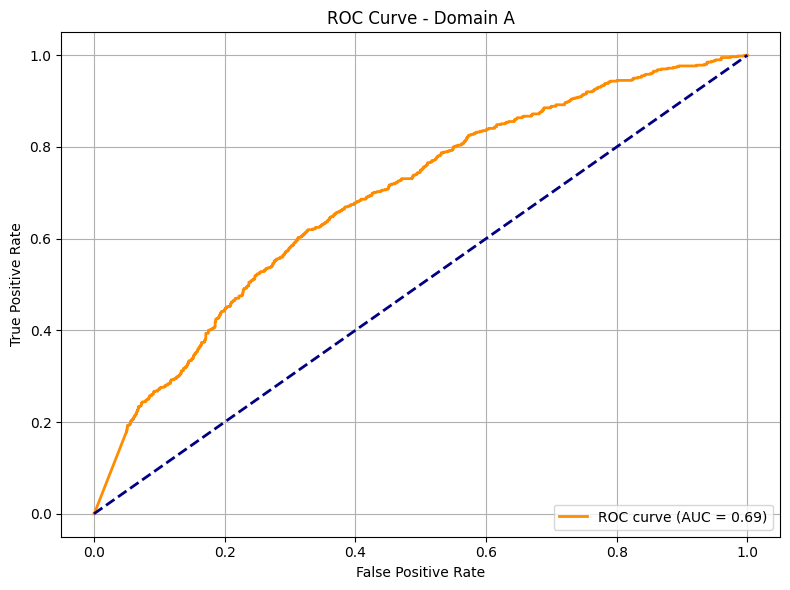

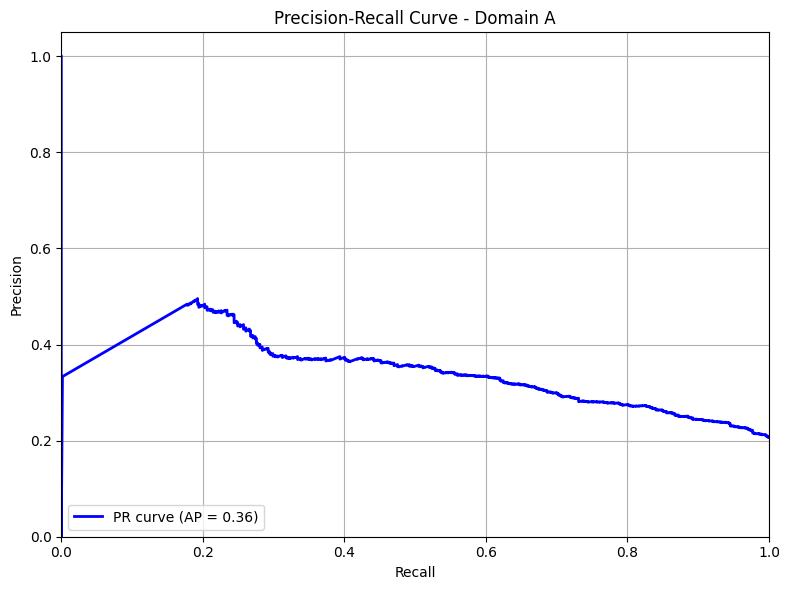

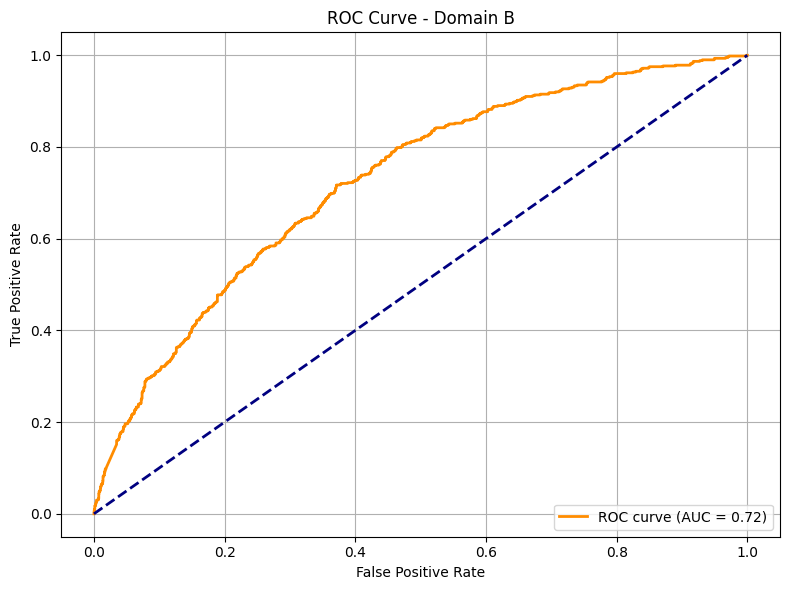

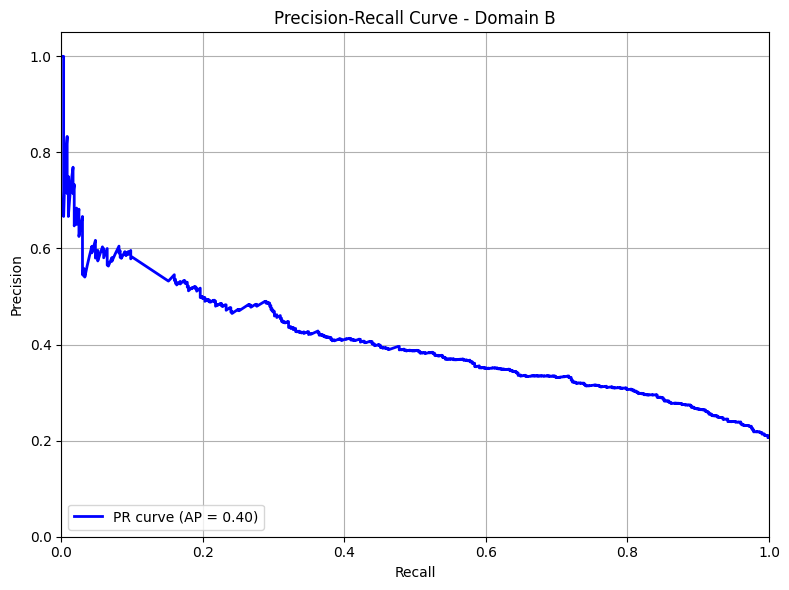

In [41]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# --- Get predictions for both outputs ---
y_pred_list = best_model.predict(
    [X_spec_test_A,X_spec_test_B],
    verbose=0
)
y_proba_private_A = y_pred_list[0][:, 1]
y_proba_private_B = y_pred_list[1][:, 1]

# --- Get true labels ---
if y_test_A.ndim > 1 and y_test_A.shape[1] > 1:
    y_true_private_A = np.argmax(y_test_A, axis=1)
else:
    y_true_private_A = y_test_A

if y_test_B.ndim > 1 and y_test_B.shape[1] > 1:
    y_true_private_B = np.argmax(y_test_B, axis=1)
else:
    y_true_private_B = y_test_B

# === DOMAIN A ===
# ROC
fpr_private_A, tpr_private_A, thresholds_roc_private_A = roc_curve(y_true_private_A, y_proba_private_A)
roc_auc_private_A = auc(fpr_private_A, tpr_private_A)

plt.figure(figsize=(8, 6))
plt.plot(fpr_private_A, tpr_private_A, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_private_A:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Domain A')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# PR
precision_private_A, recall_private_A, thresholds_pr_private_A = precision_recall_curve(y_true_private_A, y_proba_private_A)
avg_precision_private_A = average_precision_score(y_true_private_A, y_proba_private_A)

plt.figure(figsize=(8, 6))
plt.plot(recall_private_A, precision_private_A, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_private_A:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Domain A')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

# === DOMAIN B ===
# ROC
fpr_private_B, tpr_private_B, thresholds_roc_private_B = roc_curve(y_true_private_B, y_proba_private_B)
roc_auc_private_B = auc(fpr_private_B, tpr_private_B)

plt.figure(figsize=(8, 6))
plt.plot(fpr_private_B, tpr_private_B, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_private_B:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Domain B')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# PR
precision_private_B, recall_private_B, thresholds_pr_private_B = precision_recall_curve(y_true_private_B, y_proba_private_B)
avg_precision_private_B = average_precision_score(y_true_private_B, y_proba_private_B)

plt.figure(figsize=(8, 6))
plt.plot(recall_private_B, precision_private_B, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_private_B:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Domain B')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()


## Common & Specific Results

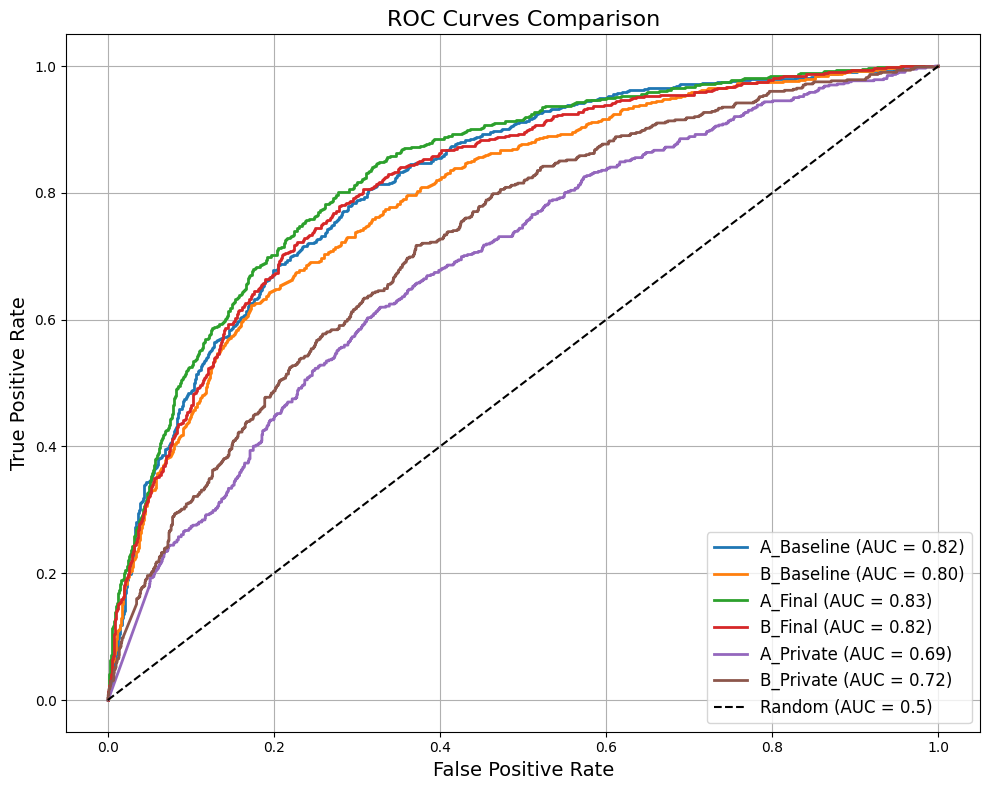

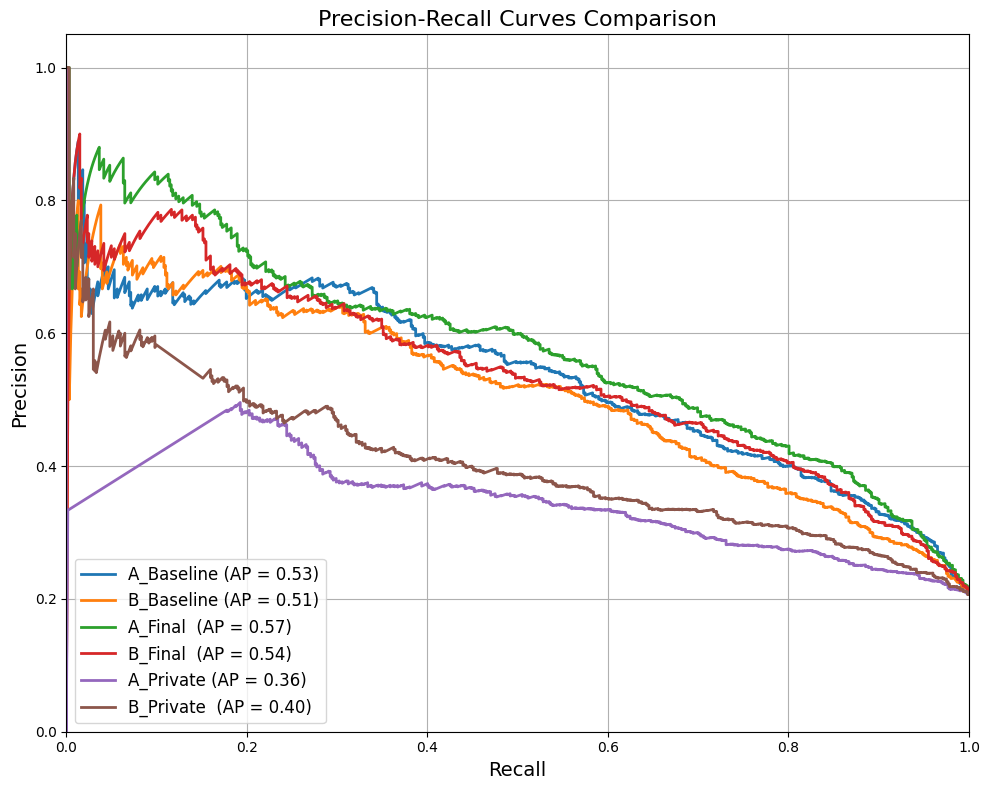

In [42]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 8))

# Plot each ROC curve
plt.plot(fpr_nn_A, tpr_nn_A, label=f'A_Baseline (AUC = {roc_auc_nn_A:.2f})', linewidth=2)
plt.plot(fpr_nn_B, tpr_nn_B, label=f'B_Baseline (AUC = {roc_auc_nn_B:.2f})', linewidth=2)
plt.plot(fpr_shared_A, tpr_shared_A, label=f'A_Final (AUC = {roc_auc_shared_A:.2f})', linewidth=2)
plt.plot(fpr_shared_B, tpr_shared_B, label=f'B_Final (AUC = {roc_auc_shared_B:.2f})', linewidth=2)
plt.plot(fpr_private_A, tpr_private_A, label=f'A_Private (AUC = {roc_auc_private_A:.2f})', linewidth=2)
plt.plot(fpr_private_B, tpr_private_B, label=f'B_Private (AUC = {roc_auc_private_B:.2f})', linewidth=2)


# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', linewidth=1.5)

# Format the plot
plt.title('ROC Curves Comparison', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
# 2. Plot all PR curves
plt.figure(figsize=(10, 8))

plt.plot(recall_nn_A, precision_nn_A, label=f'A_Baseline (AP = {avg_precision_nn_A:.2f})', linewidth=2)
plt.plot(recall_nn_B, precision_nn_B, label=f'B_Baseline (AP = {avg_precision_nn_B:.2f})', linewidth=2)
plt.plot(recall_shared_A, precision_shared_A, label=f'A_Final  (AP = {avg_precision_shared_A:.2f})', linewidth=2)
plt.plot(recall_shared_B, precision_shared_B, label=f'B_Final  (AP = {avg_precision_shared_B:.2f})', linewidth=2)
plt.plot(recall_private_A, precision_private_A, label=f'A_Private (AP = {avg_precision_private_A:.2f})', linewidth=2)
plt.plot(recall_private_B, precision_private_B, label=f'B_Private  (AP = {avg_precision_private_B:.2f})', linewidth=2)

# 3. Format the plot
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curves Comparison', fontsize=16)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

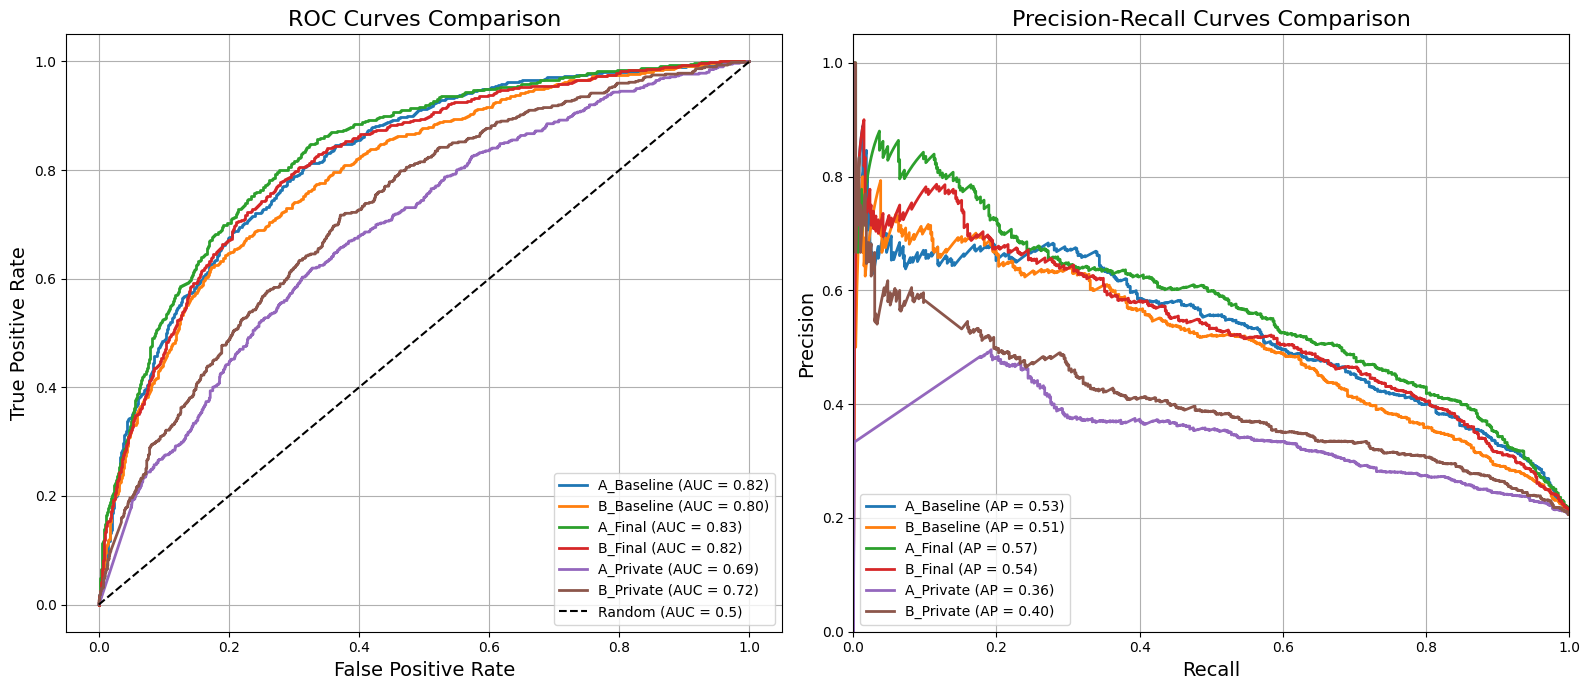

In [43]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
# Setting a wide figsize (e.g., 16x7) ensures neither plot looks squashed
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- Subplot 1: ROC Curves ---
ax1.plot(fpr_nn_A, tpr_nn_A, label=f'A_Baseline (AUC = {roc_auc_nn_A:.2f})', linewidth=2)
ax1.plot(fpr_nn_B, tpr_nn_B, label=f'B_Baseline (AUC = {roc_auc_nn_B:.2f})', linewidth=2)
ax1.plot(fpr_shared_A, tpr_shared_A, label=f'A_Final (AUC = {roc_auc_shared_A:.2f})', linewidth=2)
ax1.plot(fpr_shared_B, tpr_shared_B, label=f'B_Final (AUC = {roc_auc_shared_B:.2f})', linewidth=2)
ax1.plot(fpr_private_A, tpr_private_A, label=f'A_Private (AUC = {roc_auc_private_A:.2f})', linewidth=2)
ax1.plot(fpr_private_B, tpr_private_B, label=f'B_Private (AUC = {roc_auc_private_B:.2f})', linewidth=2)

# Plot diagonal line (random classifier)
ax1.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', linewidth=1.5)

# Formatting Subplot 1
ax1.set_title('ROC Curves Comparison', fontsize=16)
ax1.set_xlabel('False Positive Rate', fontsize=14)
ax1.set_ylabel('True Positive Rate', fontsize=14)
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(True)

# --- Subplot 2: Precision-Recall Curves ---
ax2.plot(recall_nn_A, precision_nn_A, label=f'A_Baseline (AP = {avg_precision_nn_A:.2f})', linewidth=2)
ax2.plot(recall_nn_B, precision_nn_B, label=f'B_Baseline (AP = {avg_precision_nn_B:.2f})', linewidth=2)
ax2.plot(recall_shared_A, precision_shared_A, label=f'A_Final (AP = {avg_precision_shared_A:.2f})', linewidth=2)
ax2.plot(recall_shared_B, precision_shared_B, label=f'B_Final (AP = {avg_precision_shared_B:.2f})', linewidth=2)
ax2.plot(recall_private_A, precision_private_A, label=f'A_Private (AP = {avg_precision_private_A:.2f})', linewidth=2)
ax2.plot(recall_private_B, precision_private_B, label=f'B_Private (AP = {avg_precision_private_B:.2f})', linewidth=2)

# Formatting Subplot 2
ax2.set_title('Precision-Recall Curves Comparison', fontsize=16)
ax2.set_xlabel('Recall', fontsize=14)
ax2.set_ylabel('Precision', fontsize=14)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.legend(loc='lower left', fontsize=10)
ax2.grid(True)

# Adjust layout and save
plt.tight_layout()
plt.savefig('model_comparison_curves.png', dpi=300)